In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch


# Read data

## Indicators

In [2]:
# Dateien einlesen
part1 = pd.read_pickle('pkl/year_df_part1.pkl')
part2 = pd.read_pickle('pkl/year_df_part2.pkl')

# Zusammenführen
year_df_combined = pd.concat([part1, part2], ignore_index=True)
year_df_combined

Country Code ContinentCode  Year  Agricultural land sq. km.  \
0      Afghanistan  AFG            AS  1960                        NaN   
1      Afghanistan  AFG            AS  1961                   377500.0   
2      Afghanistan  AFG            AS  1962                   378000.0   
3      Afghanistan  AFG            AS  1963                   378500.0   
4      Afghanistan  AFG            AS  1964                   379050.0   
...            ...  ...           ...   ...                        ...   
13687       Zambia  ZMB            AF  2028                        NaN   
13688     Zimbabwe  ZWE            AF  2025                        NaN   
13689     Zimbabwe  ZWE            AF  2026                        NaN   
13690     Zimbabwe  ZWE            AF  2027                        NaN   
13691     Zimbabwe  ZWE            AF  2028                        NaN   

       Crop production index (2004-2006 = 100)  Precipitation mm per year  \
0                                          NaN                        NaN   
1                                         43.2                      327.0   
2                                         44.1                      327.0   
3                                         43.0                      327.0   
4                                         46.9                      327.0   
...                                        ...                        ...   
13687                                      NaN                        NaN   
13688                                      NaN                        NaN   
13689                                      NaN                        NaN   
13690                                      NaN                        NaN   
13691                                      NaN                        NaN   

       Arable land percent of total land area  Cereal yield kg per hectar  \
0                                         NaN                         NaN   
1                                        11.7                      1115.0   
2                                        11.8                      1079.0   
3                                        11.9                       986.0   
4                                        12.0                      1083.0   
...                                       ...                         ...   
13687                                     NaN                         NaN   
13688                                     NaN                         NaN   
13689                                     NaN                         NaN   
13690                                     NaN                         NaN   
13691                                     NaN                         NaN   

       Food production index (2004-2006 = 100)  ...  \
0                                          NaN  ...   
1                                         41.0  ...   
2                                         41.3  ...   
3                                         41.2  ...   
4                                         44.6  ...   
...                                        ...  ...   
13687                                      NaN  ...   
13688                                      NaN  ...   
13689                                      NaN  ...   
13690                                      NaN  ...   
13691                                      NaN  ...   

       Electricity consumption billion kilowatthours  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
13687                                            NaN   
13688                                            NaN   
13689                                            NaN   
13690                                            Na

In [3]:
year_df_combined.columns

Index(['Country', 'Code', 'ContinentCode', 'Year', 'Agricultural land sq. km.',
       'Crop production index (2004-2006 = 100)', 'Precipitation mm per year',
       'Arable land percent of total land area', 'Cereal yield kg per hectar',
       'Food production index (2004-2006 = 100)',
       ...
       'Electricity consumption billion kilowatthours',
       'Electricity imports billion kilowatthours',
       'Electricity exports billion kilowatthours',
       'Renewable power capacity million kilowatts',
       'Renewable power generation billion kilowatthours',
       'Natural gas production', 'Natural gas consumption',
       'Biofuels production', 'Biofuels consumption',
       'Prime energy production'],
      dtype='object', length=442)

## Metadata

In [4]:
metadata = pd.read_pickle('pkl/metadata.pkl')
metadata.head()

Indicator                 Measure  \
0                       Population size, in millions                 million   
1                          Life expectancy, in years                   years   
2                           Percent urban population                 percent   
3  The number of crude births per 1000 people, pe...  births per 1000 people   
4                        Death rate, per 1000 people  deaths per 1000 people   

                                   Source Currencies  \
0      United Nations Population Division              
1  The United Nations Population Division              
2      United Nations Population Division              
3                          The World Bank              
4                          The World Bank              

                                          Definition    Time  \
0  Total population is based on the de facto defi...  annual   
1  Life expectancy at birth indicates the number ...  annual   
2  Urban population refers to people living in ur...  annual   
3  Crude birth rate indicates the number of live ...  annual   
4  Crude death rate indicates the number of death...  annual   

                          Group  
0                  Demographics  
1  Health spending and outcomes  
2                  Demographics  
3  Health spending and outcomes  
4  Health spending and outcomes

In [5]:
year_df_combined.columns = year_df_combined.columns.str.replace(',', '', regex=False)
metadata['Indicator'] = metadata['Indicator'].astype(str).str.replace(',', '', regex=False)

# Liste der Spaltennamen ab der 2. Spalte (Index 1)
spalten_liste = year_df_combined.columns[4:].tolist()

# Liste der Werte in der Spalte 'Merkmale' von df2
merkmale_liste = metadata['Indicator'].tolist()

# Vergleich: Welche Merkmale aus df2 sind in df1 enthalten?
gemeinsam = list(set(spalten_liste) & set(merkmale_liste))
nur_in_df1 = list(set(spalten_liste) - set(merkmale_liste))
nur_in_df2 = list(set(merkmale_liste) - set(spalten_liste))

#print("Gemeinsame Merkmale:", gemeinsam)
print("Nur in df1:", nur_in_df1)
print("Nur in df2:", nur_in_df2)
print("Nur in df2:", len(gemeinsam))

Nur in df1: []
Nur in df2: ['Consumer confidence survey', 'Industrial production annual percent change', 'Retail sales index', 'Retail sales Y-on-Y', 'Economic growth quarterly', 'House price index', 'Economic growth percent change in quarterly real GDP', 'GDP billion currency units', 'Business confidence survey', 'Real residential property prices Y-on-Y percent change']
Nur in df2: 438


# Data Analysis

In [6]:
# Optional: bessere Formatierung in Jupyter
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [7]:
desired_columns = [
    'Industry value added billion USD',
    'Manufacturing value added billion USD',
    'Population size in millions',
    'Capital investment as percent of GDP',
    'Economic growth: the rate of change of real GDP',
    'Economic decline index 0 (low) - 10 (high)',
    'Economic freedom overall index (0-100)',
    'Gross Domestic Product billions of U.S. dollars',
    'Population growth percent',
    'Business freedom index (0-100)',
    'Trade freedom index (0-100)',
    'Economic globalization index (0-100)',
    'Literacy rate'
]

# Nur die ersten 4 Spalten und die gewünschten behalten
df_filtered = year_df_combined.iloc[:, :4].join(year_df_combined[desired_columns])
df = df_filtered

## Initial Data Analysis (IDA)

### Checking Form & Struktur

In [8]:
df.shape

(13692, 17)

### Checking Datentypen

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13692 entries, 0 to 13691
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          13692 non-null  object 
 1   Code                                             13692 non-null  object 
 2   ContinentCode                                    11932 non-null  object 
 3   Year                                             13692 non-null  int64  
 4   Industry value added billion USD                 8324 non-null   float64
 5   Manufacturing value added billion USD            7498 non-null   float64
 6   Population size in millions                      12514 non-null  float64
 7   Capital investment as percent of GDP             8264 non-null   float64
 8   Economic growth: the rate of change of real GDP  10427 non-null  float64
 9   Economic decline index 0 (lo

### Checking first & last rows

In [10]:
df.head()

Country Code ContinentCode  Year  Industry value added billion USD  \
0  Afghanistan  AFG            AS  1960                               NaN   
1  Afghanistan  AFG            AS  1961                               NaN   
2  Afghanistan  AFG            AS  1962                               NaN   
3  Afghanistan  AFG            AS  1963                               NaN   
4  Afghanistan  AFG            AS  1964                               NaN   

   Manufacturing value added billion USD  Population size in millions  \
0                                    NaN                         8.62   
1                                    NaN                         8.79   
2                                    NaN                         8.97   
3                                    NaN                         9.16   
4                                    NaN                         9.36   

   Capital investment as percent of GDP  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Economic growth: the rate of change of real GDP  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Economic decline index 0 (low) - 10 (high)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Economic freedom overall index (0-100)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Gross Domestic Product billions of U.S. dollars  Population growth percent  \
0                                              NaN                        NaN   
1                                              NaN                       1.93   
2                                              NaN                       2.01   
3                                              NaN                       2.08   
4                                              NaN                       2.14   

   Business freedom index (0-100)  Trade freedom index (0-100)  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   

   Economic globalization index (0-100)  Literacy rate  
0                                   NaN            NaN  
1                                   NaN            NaN  
2                                   NaN            NaN  
3                                   NaN            NaN  
4                                   NaN            NaN

In [11]:
df.tail()

Country Code ContinentCode  Year  Industry value added billion USD  \
13687    Zambia  ZMB            AF  2028                               NaN   
13688  Zimbabwe  ZWE            AF  2025                               NaN   
13689  Zimbabwe  ZWE            AF  2026                               NaN   
13690  Zimbabwe  ZWE            AF  2027                               NaN   
13691  Zimbabwe  ZWE            AF  2028                               NaN   

       Manufacturing value added billion USD  Population size in millions  \
13687                                    NaN                          NaN   
13688                                    NaN                          NaN   
13689                                    NaN                          NaN   
13690                                    NaN                          NaN   
13691                                    NaN                          NaN   

       Capital investment as percent of GDP  \
13687                                   NaN   
13688                                   NaN   
13689                                   NaN   
13690                                   NaN   
13691                                   NaN   

       Economic growth: the rate of change of real GDP  \
13687                                              NaN   
13688                                              NaN   
13689                                              NaN   
13690                                              NaN   
13691                                              NaN   

       Economic decline index 0 (low) - 10 (high)  \
13687                                         NaN   
13688                                         NaN   
13689                                         NaN   
13690                                         NaN   
13691                                         NaN   

       Economic freedom overall index (0-100)  \
13687                                     NaN   
13688                                     NaN   
13689                                     NaN   
13690                                     NaN   
13691                                     NaN   

       Gross Domestic Product billions of U.S. dollars  \
13687                                              NaN   
13688                                              NaN   
13689                                              NaN   
13690                                              NaN   
13691                                              NaN   

       Population growth percent  Business freedom index (0-100)  \
13687                        NaN                             NaN   
13688                        NaN                             NaN   
13689                        NaN                             NaN   
13690                        NaN                             NaN   
13691                        NaN                             NaN   

       Trade freedom index (0-100)  Economic globalization index (0-100)  \
13687                          NaN                                   NaN   
13688                          NaN                                   NaN   
13689                          NaN                                   NaN   
13690                          NaN                                   NaN   
13691                          NaN                                   NaN   

       Literacy rate  
13687            NaN  
13688            NaN  
13689            NaN  
13690            NaN  
13691            NaN

### Checking Missing Values

In [12]:
# Übersicht zu fehlenden Werten
df.isnull().sum().sort_values(ascending=False)

Literacy rate                                      12648
Economic decline index 0 (low) - 10 (high)         10544
Trade freedom index (0-100)                         8764
Economic freedom overall index (0-100)              8751
Business freedom index (0-100)                      8708
Manufacturing value added billion USD               6194
Capital investment as percent of GDP                5428
Industry value added billion USD                    5368
Economic globalization index (0-100)                4628
Economic growth: the rate of change of real GDP     3265
Gross Domestic Product billions of U.S. dollars     2958
ContinentCode                                       1760
Population growth percent                           1376
Population size in millions                         1178
Code                                                   0
Year                                                   0
Country                                                0
dtype: int64

### Checking latest year for features

In [13]:
pivot_df = pd.melt(df, id_vars=['Country', 'Code', 'ContinentCode', 'Year'], var_name='Indicator', value_name='Value')

# Wählen Sie die Jahre aus, die Sie überprüfen möchten
jahre_liste = [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]

# Ergebnis-DataFrame initialisieren
result_df_all_years = pd.DataFrame()

# Iteration über die ausgewählten Jahre
for year in jahre_liste:
    # Filtern Sie den DataFrame für das aktuelle Jahr
    pivot_df_year = pivot_df[pivot_df['Year'] == year]

    sum_all_1 = pivot_df_year.groupby('Indicator')['Value'].count()

    # Fügen Sie die Summen für das aktuelle Jahr als Spalten hinzu
    result_df_all_years[f'{year}'] = sum_all_1
    
# Anzeige des resultierenden DataFrames
result_df_all_years


2019  2020  2021  2022  2023  \
Indicator                                                                       
Business freedom index (0-100)                    182   181   181   175   179   
Capital investment as percent of GDP              165   163   162   154   128   
Economic decline index 0 (low) - 10 (high)        175   175   172   176   176   
Economic freedom overall index (0-100)            177   176   176   175   174   
Economic globalization index (0-100)              182   181   181   181     0   
Economic growth: the rate of change of real GDP   190   190   190   190   184   
Gross Domestic Product billions of U.S. dollars   191   191   191   191   184   
Industry value added billion USD                  187   185   184   181   167   
Literacy rate                                      40    32    48    54     5   
Manufacturing value added billion USD             176   175   172   166   152   
Population growth percent                         196   196   196   195   196   
Population size in millions                       196   196   196   196   196   
Trade freedom index (0-100)                       178   177   177   173   174   

                                                 2024  2025  2026  2027  
Indicator                                                                
Business freedom index (0-100)                    175     0     0     0  
Capital investment as percent of GDP                0     0     0     0  
Economic decline index 0 (low) - 10 (high)        174     0     0     0  
Economic freedom overall index (0-100)            174     0     0     0  
Economic globalization index (0-100)                0     0     0     0  
Economic growth: the rate of change of real GDP     0     0     0     0  
Gross Domestic Product billions of U.S. dollars     0     0     0     0  
Industry value added billion USD                    0     0     0     0  
Literacy rate                                       0     0     0     0  
Manufacturing value added billion USD               0     0     0     0  
Population growth percent                           0     0     0     0  
Population size in millions                         0     0     0     0  
Trade freedom index (0-100)                       175     0     0     0

In [14]:
# Ursprüngliches DataFrame schmelzen (falls noch nicht gemacht)
pivot_df = pd.melt(df, id_vars=['Country', 'Code', 'ContinentCode', 'Year'], 
                   var_name='Indicator', value_name='Value')

# Wählen Sie die Jahre aus, die Sie überprüfen möchten
jahre_liste = [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]

# Ergebnis-DataFrame initialisieren
result_df_all_years = pd.DataFrame()

# Iteration über die ausgewählten Jahre
for year in jahre_liste:
    # Filter für das aktuelle Jahr
    pivot_df_year = pivot_df[pivot_df['Year'] == year]

    # Gruppierung nach Land statt nach Indikator
    sum_all_1 = pivot_df_year.groupby('Country')['Value'].count()

    # Zusammenführen in das Ergebnis-DataFrame
    result_df_all_years[f'{year}'] = sum_all_1

# Ergebnis anzeigen
result_df_all_years.head(40)


2019  2020  2021  2022  2023  2024  2025  2026  2027
Country                                                                       
Afghanistan                 11    12    13     9     8   1.0   NaN   NaN   NaN
Albania                     12    12    12    12    10   4.0   0.0   0.0   0.0
Algeria                     12    12    12    12    11   4.0   0.0   0.0   0.0
Andorra                      6     6     6     6     6   0.0   0.0   0.0   0.0
Angola                      12    12    12    13    11   4.0   0.0   0.0   0.0
Antigua and Barbuda          8     8     7     8     7   1.0   0.0   0.0   0.0
Argentina                   12    12    12    12    11   4.0   0.0   0.0   0.0
Armenia                      8     8     8     8     8   3.0   0.0   0.0   0.0
Aruba                        8     7     6     6     4   0.0   0.0   0.0   0.0
Australia                   12    12    12    12    11   4.0   0.0   0.0   0.0
Austria                     12    12    12    12    11   4.0   0.0   0.0   0.0
Azerbaijan                  13    12    12    12    12   4.0   0.0   0.0   0.0
Bahamas                     12    12    12    12    11   4.0   0.0   0.0   0.0
Bahrain                     12    12    12    12    11   4.0   0.0   0.0   0.0
Bangladesh                  13    13    13    12    11   4.0   0.0   0.0   0.0
Barbados                    12    12    12    12    10   4.0   0.0   0.0   0.0
Belarus                     13    12    12    12    11   4.0   0.0   0.0   0.0
Belgium                     12    12    12    12    11   4.0   0.0   0.0   0.0
Belize                      12    12    12    12    11   4.0   0.0   0.0   0.0
Benin                       12    12    13    13    11   4.0   0.0   0.0   0.0
Bermuda                      8     8     8     8     4   NaN   NaN   NaN   NaN
Bhutan                      12    12    12    13     6   4.0   0.0   0.0   0.0
Bolivia                     12    13    12    12    10   4.0   0.0   0.0   0.0
Bosnia and Herzegovina      12    12    12    13    11   4.0   0.0   0.0   0.0
Botswana                    12    12    12    12    11   4.0   0.0   0.0   0.0
Brazil                      12    12    12    13    11   4.0   0.0   0.0   0.0
Brunei                      12    12    13    12    11   4.0   0.0   0.0   0.0
Bulgaria                    11    11    12    11    10   4.0   0.0   0.0   0.0
Burkina Faso                13    12    13    13    11   4.0   0.0   0.0   0.0
Burma (Myanmar)             12    11    11    11    10   4.0   0.0   0.0   0.0
Burundi                     11    11    11    12    10   4.0   0.0   0.0   0.0
Cambodia                    12    12    13    13    11   4.0   0.0   0.0   0.0
Cameroon                    12    13    12    12    11   4.0   0.0   0.0   0.0
Canada                      12    12    10    10     9   4.0   0.0   0.0   0.0
Cape Verde                  12    12    12    13    11   4.0   0.0   0.0   0.0
Central African Republic    13    13    12    12    11   4.0   0.0   0.0   0.0
Chad                        13    12    11    12    10   4.0   0.0   0.0   0.0
Chile                       12    12    12    13    11   4.0   0.0   0.0   0.0
China                       12    13    12    12    10   4.0   0.0   0.0   0.0
Colombia                    13    13    12    12    11   4.0   0.0   0.0   0.0

In [15]:
# Gesamtanzahl der Werte pro Land über alle Jahre hinweg
result_df_all_years['Total'] = result_df_all_years.sum(axis=1)

# Sortieren nach der Gesamtanzahl
sorted_df = result_df_all_years.sort_values('Total')

# 5 Länder mit den wenigsten Werten
bottom_5 = sorted_df.head(10)

# 5 Länder mit den meisten Werten
top_5 = sorted_df.tail(10)

# Anzeige
print("5 Länder mit den wenigsten Werten:")
print(bottom_5)

print("\n5 Länder mit den meisten Werten:")
print(top_5)


5 Länder mit den wenigsten Werten:
               2019  2020  2021  2022  2023  2024  2025  2026  2027  Total
Country                                                                   
Montserrat        0     0     0     0     0   NaN   NaN   NaN   NaN    0.0
Euro area         0     0     0     0     0   NaN   NaN   NaN   NaN    0.0
Gibraltar         2     2     2     2     2   NaN   NaN   NaN   NaN   10.0
Taiwan            3     3     3     3     3   3.0   0.0   0.0   0.0   18.0
New Caledonia     5     4     4     4     2   NaN   NaN   NaN   NaN   19.0
Tuvalu            4     4     4     4     4   0.0   0.0   0.0   0.0   20.0
Liechtenstein     5     5     5     3     3   2.0   NaN   NaN   NaN   23.0
Cuba              4     4     4     4     4   4.0   NaN   NaN   NaN   24.0
Monaco            5     5     5     5     5   0.0   NaN   NaN   NaN   25.0
Yemen             6     6     6     4     4   1.0   0.0   0.0   0.0   27.0

5 Länder mit den meisten Werten:
              2019  2020  2021 

In [16]:
# Ursprüngliches DataFrame schmelzen (falls noch nicht gemacht)
pivot_df = pd.melt(df, id_vars=['Country', 'Code', 'ContinentCode', 'Year'], 
                   var_name='Indicator', value_name='Value')

# Wählen Sie die Jahre aus, die Sie überprüfen möchten
jahre_liste = [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]

# Ergebnis-DataFrame initialisieren
result_df_all_years = pd.DataFrame()

# Iteration über die ausgewählten Jahre
for year in jahre_liste:
    # Filter für das aktuelle Jahr
    pivot_df_year = pivot_df[pivot_df['Year'] == year]

    # Gruppierung nach Land statt nach Indikator
    sum_all_1 = pivot_df_year.groupby('ContinentCode')['Value'].count()

    # Zusammenführen in das Ergebnis-DataFrame
    result_df_all_years[f'{year}'] = sum_all_1

# Ergebnis anzeigen
result_df_all_years.head(40)


2019  2020  2021  2022  2023  2024  2025  2026  2027
ContinentCode                                                      
AF              625   623   620   632   549   206     0     0     0
AS              548   540   540   528   449   165     0     0     0
EU              528   524   538   522   469   163     0     0     0
OC              128   128   130   125   100    37     0     0     0
SA              140   143   139   143   122    48     0     0     0

In [17]:
df['ContinentCode'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [18]:
# Mapping Dictionary: ISO-Code → Englischer Name
continent_name_map = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania',
    'AN': 'Antarctica'
}

# Index (ContinentCode) in neue Spalte übernehmen
df = df.reset_index()

# Englische Kontinentnamen hinzufügen
df['Continent'] = df['ContinentCode'].map(continent_name_map)

# Optional: Spaltenreihenfolge anpassen
cols = ['ContinentCode', 'Continent'] + [col for col in df.columns if col not in ['ContinentCode', 'Continent']]
df = df[cols]

# Ausgabe
df.head()

ContinentCode Continent  index      Country Code  Year  \
0            AS      Asia      0  Afghanistan  AFG  1960   
1            AS      Asia      1  Afghanistan  AFG  1961   
2            AS      Asia      2  Afghanistan  AFG  1962   
3            AS      Asia      3  Afghanistan  AFG  1963   
4            AS      Asia      4  Afghanistan  AFG  1964   

   Industry value added billion USD  Manufacturing value added billion USD  \
0                               NaN                                    NaN   
1                               NaN                                    NaN   
2                               NaN                                    NaN   
3                               NaN                                    NaN   
4                               NaN                                    NaN   

   Population size in millions  Capital investment as percent of GDP  \
0                         8.62                                   NaN   
1                         8.79                                   NaN   
2                         8.97                                   NaN   
3                         9.16                                   NaN   
4                         9.36                                   NaN   

   Economic growth: the rate of change of real GDP  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Economic decline index 0 (low) - 10 (high)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Economic freedom overall index (0-100)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Gross Domestic Product billions of U.S. dollars  Population growth percent  \
0                                              NaN                        NaN   
1                                              NaN                       1.93   
2                                              NaN                       2.01   
3                                              NaN                       2.08   
4                                              NaN                       2.14   

   Business freedom index (0-100)  Trade freedom index (0-100)  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   

   Economic globalization index (0-100)  Literacy rate  
0                                   NaN            NaN  
1                                   NaN            NaN  
2                                   NaN            NaN  
3                                   NaN            NaN  
4                                   NaN            NaN

In [19]:
df['ContinentCode'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [20]:
df[pd.isna(df['ContinentCode'])]['Country'].drop_duplicates().tolist()

['Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Belize',
 'Bermuda',
 'Canada',
 'Costa Rica',
 'Dominica',
 'Dominican Republic',
 'El Salvador',
 'Grenada',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Jamaica',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Puerto Rico',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Trinidad and Tobago',
 'USA',
 'Cuba',
 'Montserrat']

In [21]:
north_america_countries = [
    'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda',
    'Canada', 'Costa Rica', 'Dominica', 'Dominican Republic', 'El Salvador',
    'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
    'USA', 'Cuba', 'Montserrat'
]

# Ergänze ggf. die fehlenden ContinentCodes in deinem DataFrame
df.loc[
    df['Country'].isin(north_america_countries),
    'ContinentCode'
] = 'NA'

# Danach kannst du das Mapping erneut anwenden
df['Continent'] = df['ContinentCode'].map(continent_name_map)

In [22]:
# DataFrame schmelzen (falls noch nicht gemacht)
pivot_df = pd.melt(df, id_vars=['Country', 'Code', 'ContinentCode', 'Year'], 
                   var_name='Indicator', value_name='Value')

# Liste der Jahre
jahre_liste = [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]

# Ergebnis-DataFrame initialisieren
avg_entries_per_country = pd.DataFrame()

# Schleife über Jahre
for year in jahre_liste:
    # Jahr filtern
    year_df = pivot_df[pivot_df['Year'] == year]

    # Zähle Einträge pro Land innerhalb des Kontinents
    entries_per_country = year_df.groupby(['ContinentCode', 'Country'])['Value'].count()

    # Mittelwert pro Kontinent berechnen
    avg_per_continent = entries_per_country.groupby('ContinentCode').mean()

    # Zum Ergebnis-DataFrame hinzufügen
    avg_entries_per_country[f'{year}'] = avg_per_continent

# Auf eine Nachkommastelle runden
avg_entries_per_country = avg_entries_per_country.round(1)

# Ergebnis anzeigen
avg_entries_per_country.head(40)


2019  2020  2021  2022  2023  2024  2025  2026  2027
ContinentCode                                                      
AF             13.8  13.8  13.7  13.9  12.4   5.9   2.0   2.0   2.0
AS             13.4  13.2  13.2  13.0  11.4   5.4   2.0   2.0   2.0
EU             13.0  12.9  13.2  12.9  11.8   5.6   2.0   2.0   2.0
NA             12.2  12.0  12.0  11.9  10.7   5.3   2.0   2.0   2.0
OC             11.8  11.8  12.0  11.6   9.7   5.1   2.0   2.0   2.0
SA             13.7  13.9  13.6  13.9  12.2   6.0   2.0   2.0   2.0

### Checking unique values

In [23]:
# Anzahl eindeutiger Werte pro Spalte
df.nunique().sort_values()

ContinentCode                                          6
Continent                                              6
Year                                                  69
Trade freedom index (0-100)                           79
Economic freedom overall index (0-100)                80
Business freedom index (0-100)                        84
Economic decline index 0 (low) - 10 (high)            93
Country                                              202
Code                                                 202
Literacy rate                                        282
Population growth percent                            933
Economic growth: the rate of change of real GDP     2395
Manufacturing value added billion USD               2664
Capital investment as percent of GDP                3052
Industry value added billion USD                    3380
Population size in millions                         4105
Economic globalization index (0-100)                4767
Gross Domestic Product billions

### Basic statistics

In [24]:
# Grundstatistik
df.describe(include='all').T

count unique        top  \
ContinentCode                                      13692      6         AF   
Continent                                          13692      6     Africa   
index                                            13692.0    NaN        NaN   
Country                                            13692    202  Lithuania   
Code                                               13692    202        LTU   
Year                                             13692.0    NaN        NaN   
Industry value added billion USD                  8324.0    NaN        NaN   
Manufacturing value added billion USD             7498.0    NaN        NaN   
Population size in millions                      12514.0    NaN        NaN   
Capital investment as percent of GDP              8264.0    NaN        NaN   
Economic growth: the rate of change of real GDP  10427.0    NaN        NaN   
Economic decline index 0 (low) - 10 (high)        3148.0    NaN        NaN   
Economic freedom overall index (0-100)            4941.0    NaN        NaN   
Gross Domestic Product billions of U.S. dollars  10734.0    NaN        NaN   
Population growth percent                        12316.0    NaN        NaN   
Business freedom index (0-100)                    4984.0    NaN        NaN   
Trade freedom index (0-100)                       4928.0    NaN        NaN   
Economic globalization index (0-100)              9064.0    NaN        NaN   
Literacy rate                                     1044.0    NaN        NaN   

                                                 freq         mean  \
ContinentCode                                    3653          NaN   
Continent                                        3653          NaN   
index                                             NaN       6845.5   
Country                                            69          NaN   
Code                                               69          NaN   
Year                                              NaN  1993.928498   
Industry value added billion USD                  NaN    60.273512   
Manufacturing value added billion USD             NaN    39.128145   
Population size in millions                       NaN    27.664585   
Capital investment as percent of GDP              NaN    23.147631   
Economic growth: the rate of change of real GDP   NaN  9637.170829   
Economic decline index 0 (low) - 10 (high)        NaN     5.681226   
Economic freedom overall index (0-100)            NaN    59.665857   
Gross Domestic Product billions of U.S. dollars   NaN   197.469521   
Population growth percent                         NaN     1.731267   
Business freedom index (0-100)                    NaN    63.899679   
Trade freedom index (0-100)                       NaN     69.99513   
Economic globalization index (0-100)              NaN    50.264654   
Literacy rate                                     NaN    79.986705   

                                                           std     min  \
ContinentCode                                              NaN     NaN   
Continent                                                  NaN     NaN   
index                                              3952.684278     0.0   
Country                                                    NaN     NaN   
Code                                                       NaN     NaN   
Year                                                 19.815637  1960.0   
Industry value added billion USD                    300.015825     0.0   
Manufacturing value added billion USD               210.326726     0.0   
Population size in millions                         110.160467    0.01   
Capital investment as percent of GDP                  8.659905  -15.92   
Economic growth: the rate of change of real GDP  983697.553267  -64.05   
Economic decline index 0 (low) - 10 (high)            1.963554     0.7   
Economic freedom overall index (0-100)               11.681306     1.0   
Gross Domestic Product billions of U.S. dollars    10

### Detect outlieres

Z-Score

In [27]:
# Jahr 2023 filtern
df_2023 = df[df['Year'] == 2023].copy()

# Länder mit fehlenden Werten identifizieren
missing_countries = df_2023[df_2023['Population size in millions'].isna()]['Country'].unique()

# Fehlende Länder ausgeben
print("Länder mit fehlender Bevölkerungszahl im Jahr 2023:")
for country in missing_countries:
    print("-", country)

# NaN-Werte entfernen
df_2023 = df_2023.dropna(subset=['Population size in millions'])

# Z-Score berechnen
df_2023['Z_Score'] = zscore(df_2023['Population size in millions'])

# Ausreißer mit |Z| > 0.1
outliers = np.abs(df_2023['Z_Score']) > 1.5
df_outliers = df_2023.loc[outliers, ['Country', 'Population size in millions', 'Z_Score']]

# Ergebnis anzeigen
df_outliers


Länder mit fehlender Bevölkerungszahl im Jahr 2023:
- Cuba
- Euro area
- Taiwan
- Montserrat


Country  Population size in millions   Z_Score
2460       China                      1410.71  9.245281
4991   Indonesia                       277.53  1.598278
11855        USA                       334.91  1.985494
12463      India                      1428.63  9.366210

In [28]:
from scipy.stats import zscore
import numpy as np

# Jahr 2023 filtern
df_2023 = df[df['Year'] == 2023].copy()

# Länder mit fehlenden Werten identifizieren
missing_countries = df_2023[df_2023['Industry value added billion USD'].isna()]['Country'].unique()

# Fehlende Länder ausgeben
print("Länder mit fehlendem Industrie-BIP (in Mrd. USD) im Jahr 2023:")
for country in missing_countries:
    print("-", country)

# NaN-Werte entfernen
df_2023 = df_2023.dropna(subset=['Industry value added billion USD'])

# Z-Score berechnen
df_2023['Z_Score'] = zscore(df_2023['Industry value added billion USD'])

# Ausreißer mit |Z| > 0.1
outliers = np.abs(df_2023['Z_Score']) > 1.5
df_outliers = df_2023.loc[outliers, ['Country', 'Industry value added billion USD', 'Z_Score']]

# Ergebnis anzeigen
df_outliers


Länder mit fehlendem Industrie-BIP (in Mrd. USD) im Jahr 2023:
- Armenia
- Aruba
- Bhutan
- Guyana
- Israel
- Japan
- New Zealand
- Palestine
- Solomon Islands
- Tajikistan
- Tonga
- Trinidad and Tobago
- USA
- Vanuatu
- Canada
- Cuba
- Eritrea
- Lebanon
- North Korea
- Somalia
- Syria
- Venezuela
- Yemen
- Bermuda
- Euro area
- Kiribati
- New Caledonia
- San Marino
- Taiwan
- Tuvalu
- Gibraltar
- Montserrat
- Liechtenstein


Country  Industry value added billion USD    Z_Score
2460     China                           6812.37  12.227037
12439  Germany                           1214.84   1.992812

IQR

In [29]:
# === Parameter definieren ===
column = 'Industry value added billion USD'  # Spalte, die analysiert wird
threshold = 5  # IQR-Faktor
year = 2023      # Jahr

# === 1. Daten für das Jahr 2023 filtern ===
df_year = df[df['Year'] == year].copy()

# === 2. NaN-Werte entfernen ===
df_clean = df_year.dropna(subset=[column])

# === 3. IQR-Grenzen berechnen ===
Q1 = df_clean[column].quantile(0.25)
Q3 = df_clean[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

print(f"\nIQR-Grenzen für '{column}' im Jahr {year}:")
print(f"  Untergrenze: {lower_bound:.2f}")
print(f"  Obergrenze:  {upper_bound:.2f}")

# === 4. Ausreißer identifizieren ===
outliers = (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)
df_outliers = df_clean.loc[outliers, ['Country', column]]

# === 5. Ergebnis anzeigen ===
df_outliers


IQR-Grenzen für 'Industry value added billion USD' im Jahr 2023:
  Untergrenze: -447.38
  Obergrenze:  544.33


Country  Industry value added billion USD
2460            China                           6812.37
3820           France                            563.68
4991        Indonesia                            551.43
7076           Mexico                            564.63
11727  United Kingdom                            591.66
12439         Germany                           1214.84
12463           India                            892.98
12551          Russia                            619.52

Visually: histograms

In [30]:
# Kategorische Daten als "category" casten
categorical_columns = ['Country', 'Code', 'ContinentCode']
for col in categorical_columns:
    df[col] = df[col].astype('category')

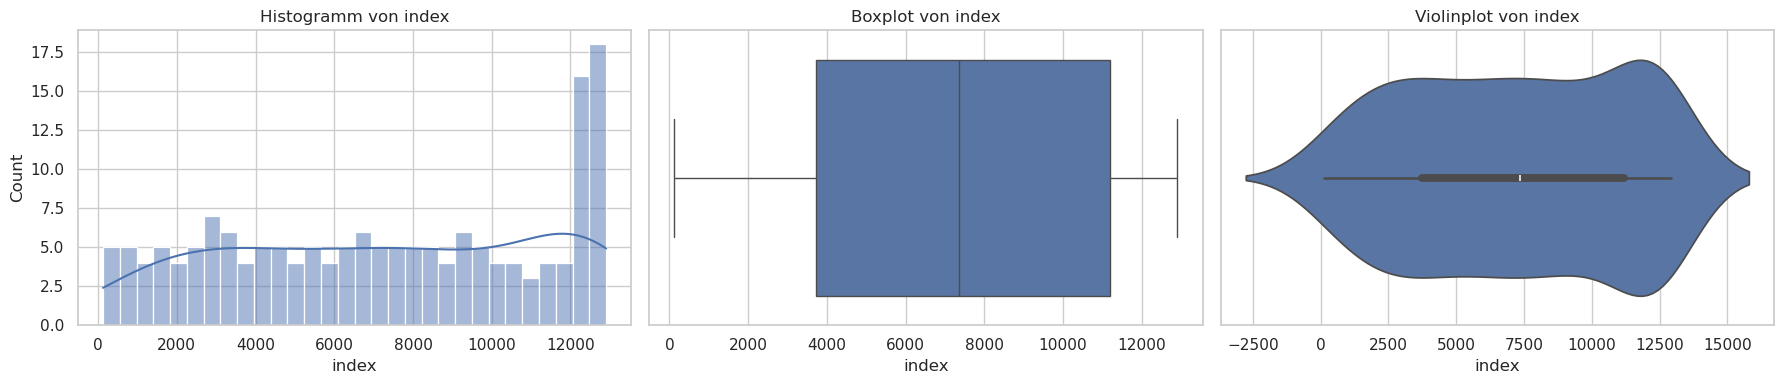

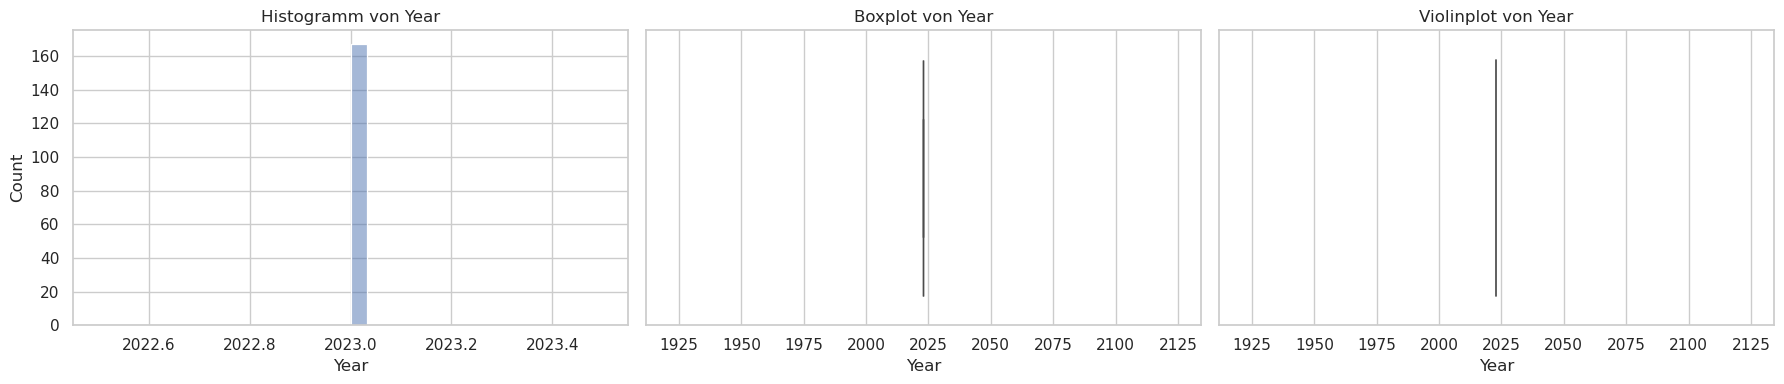

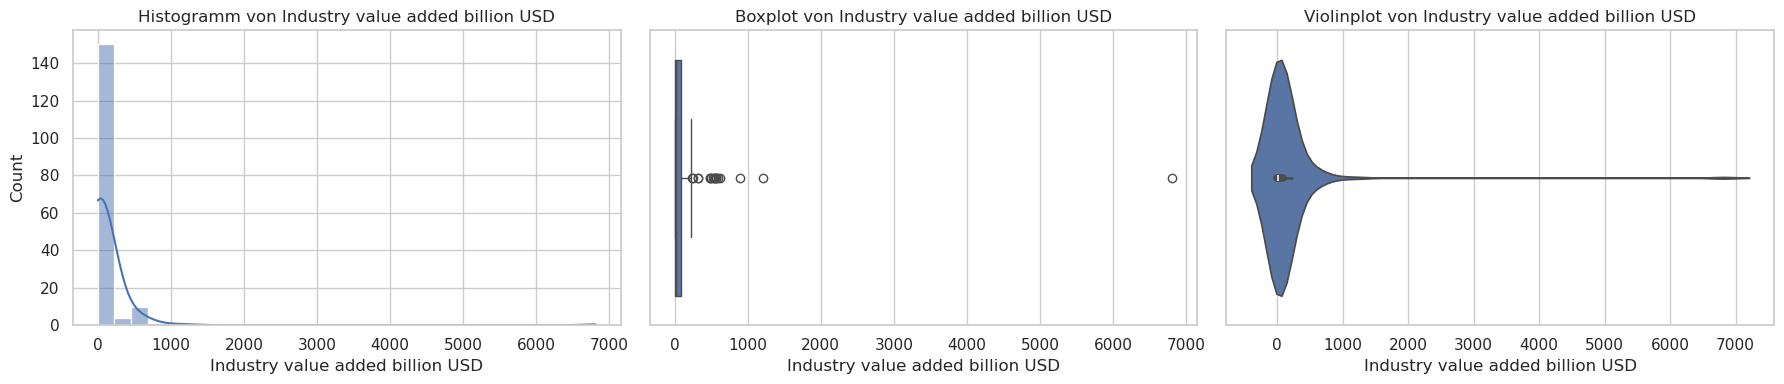

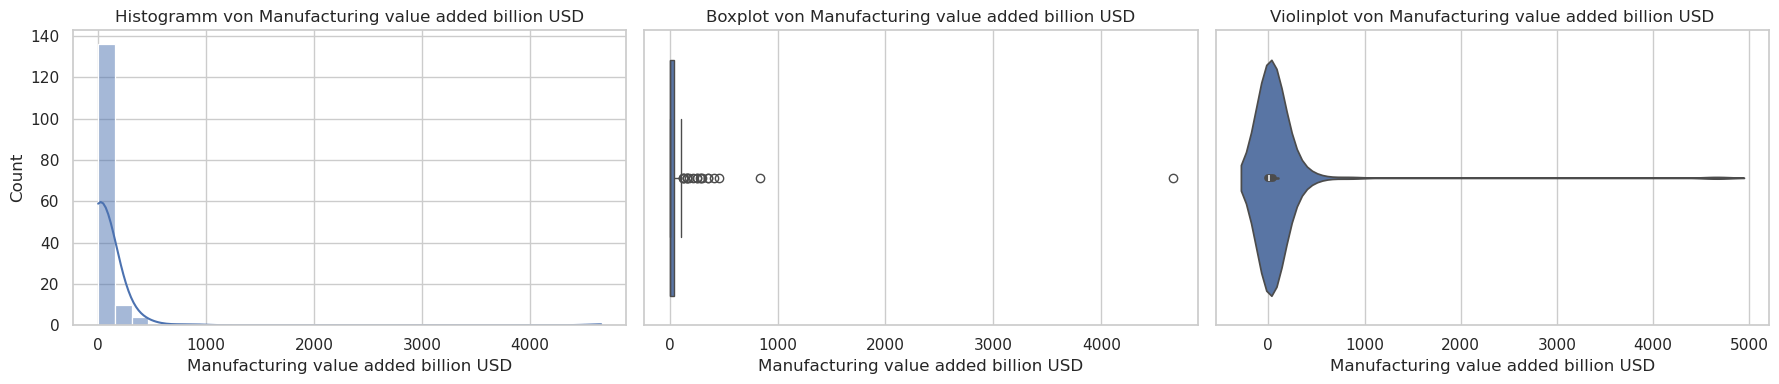

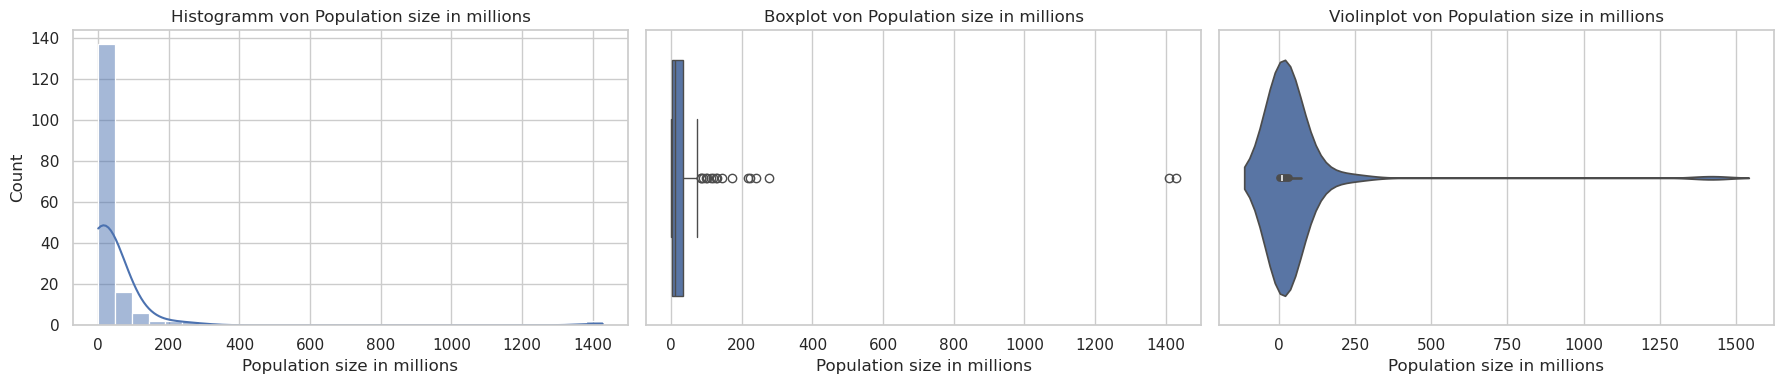

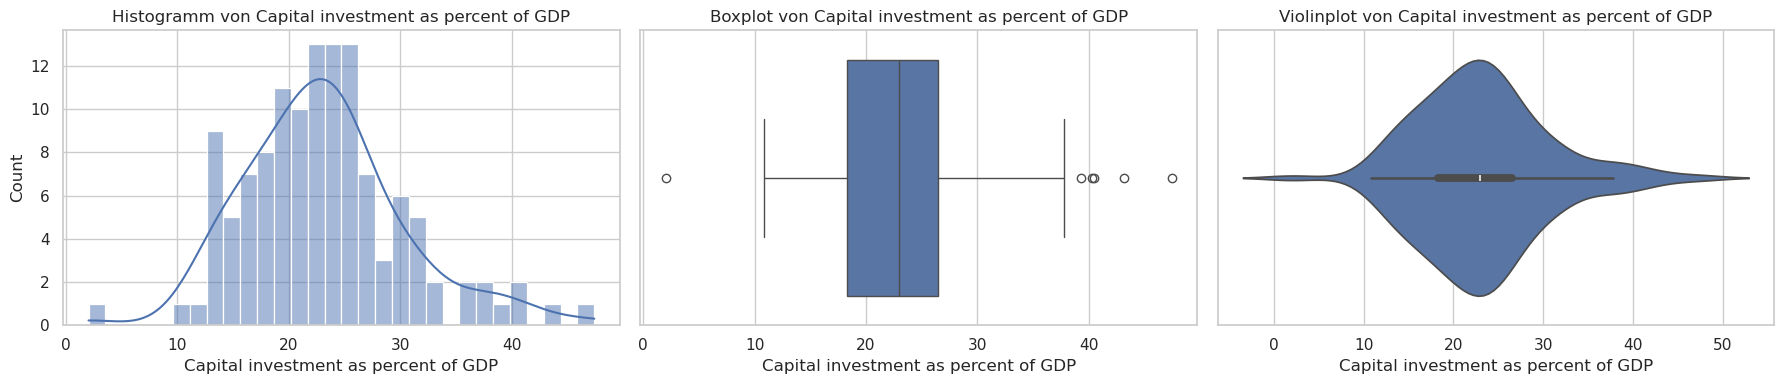

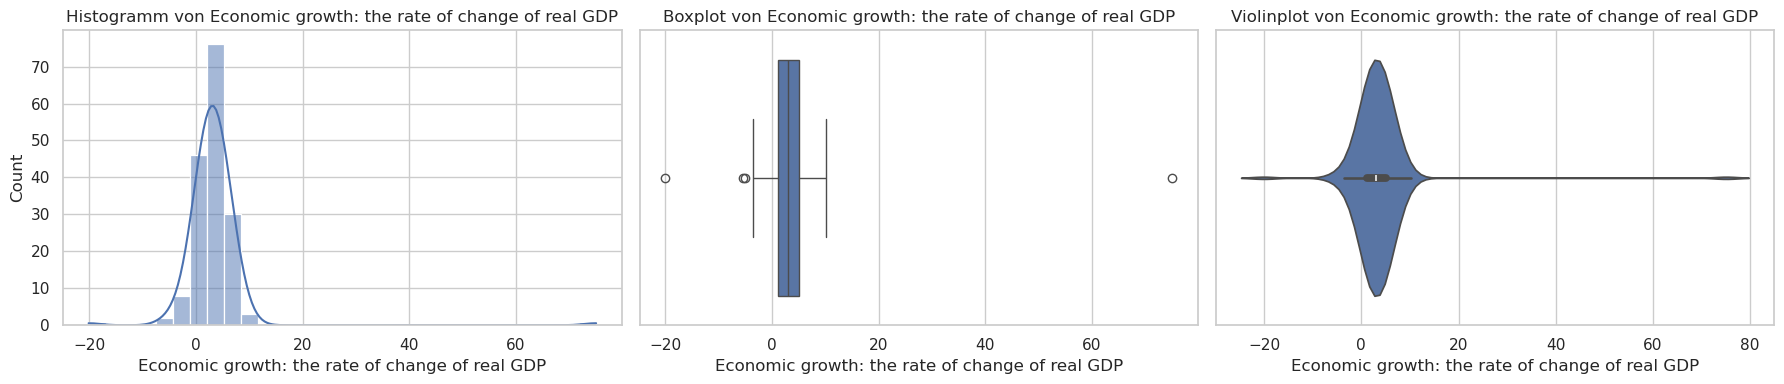

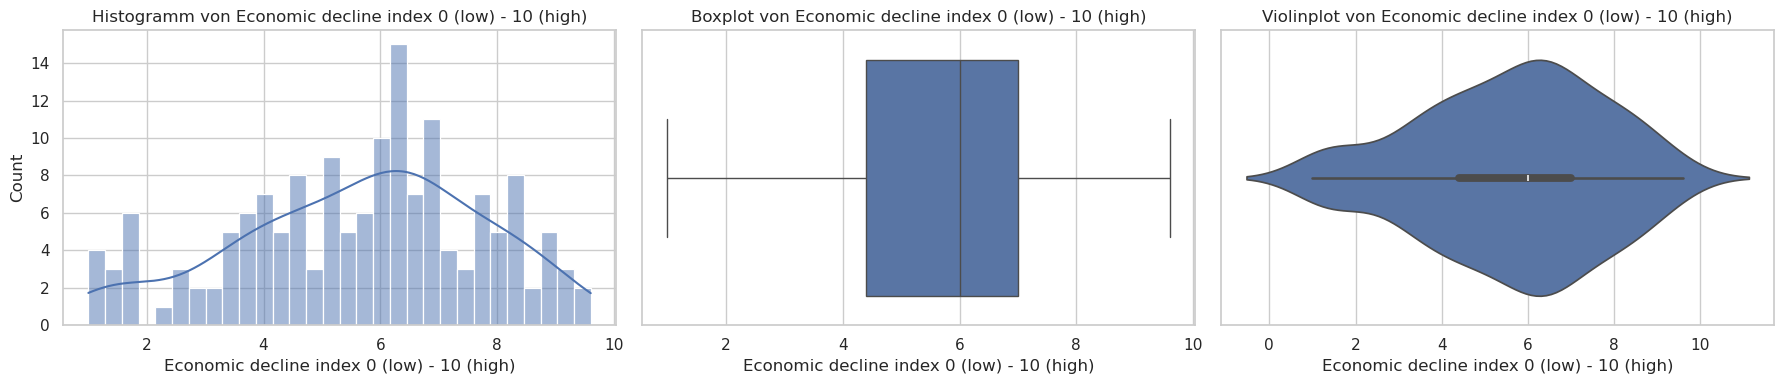

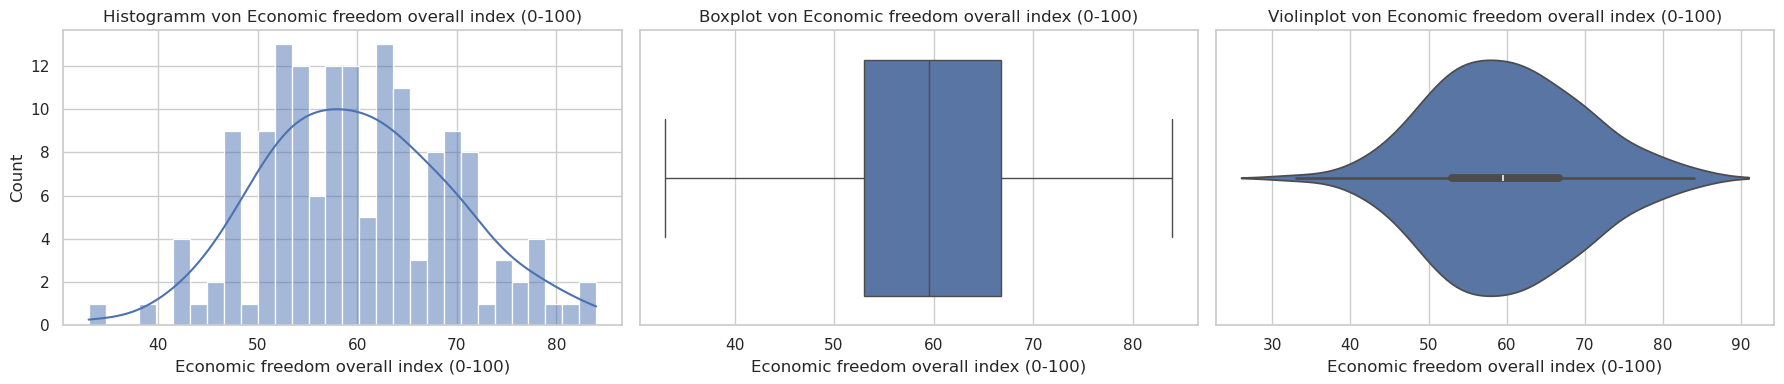

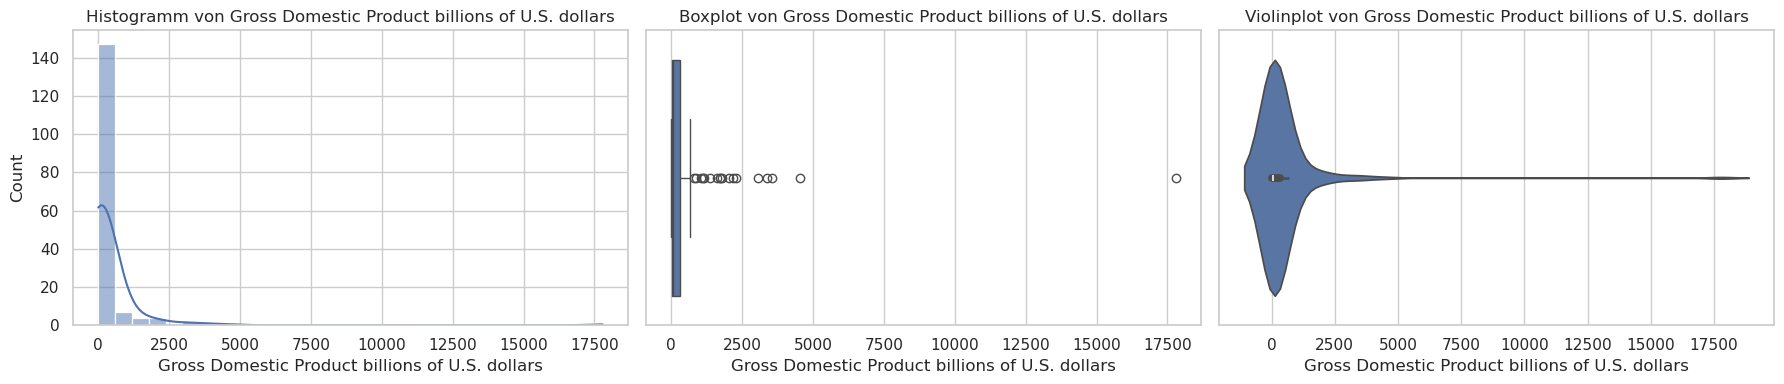

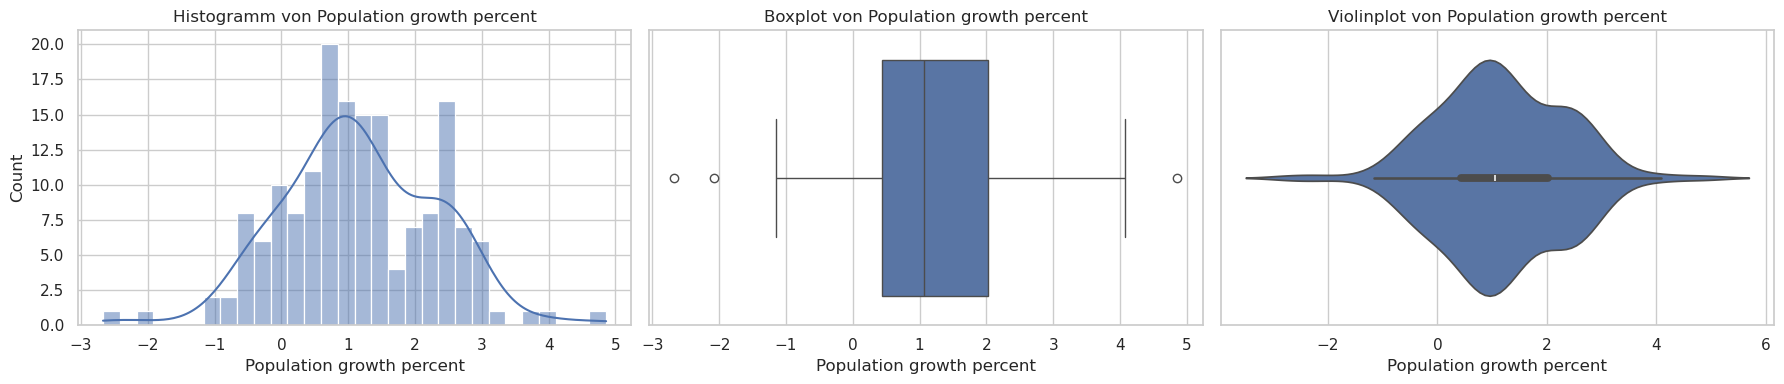

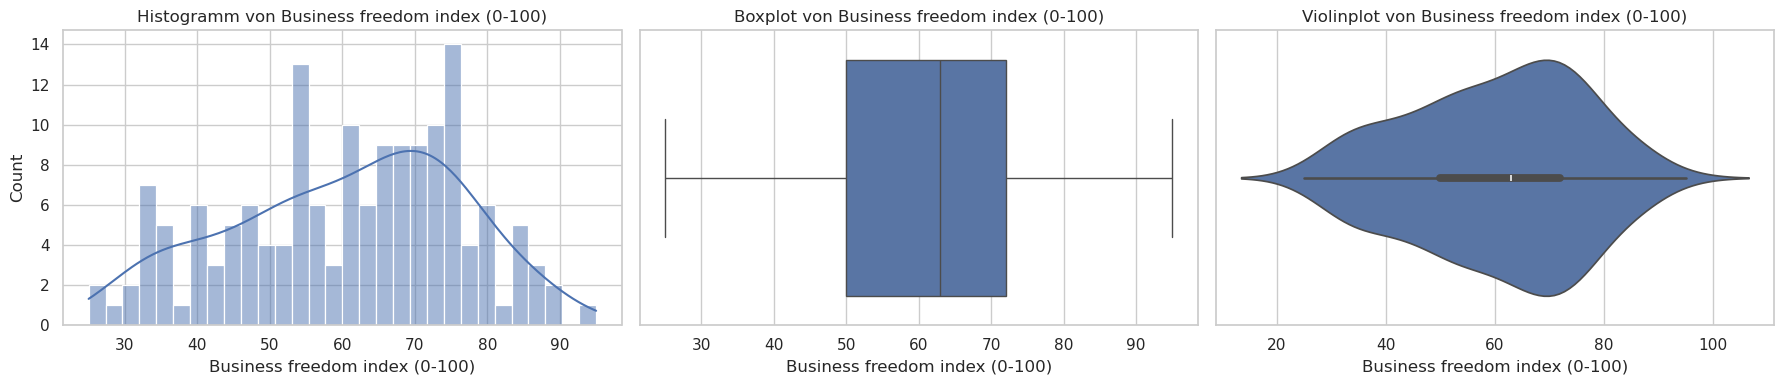

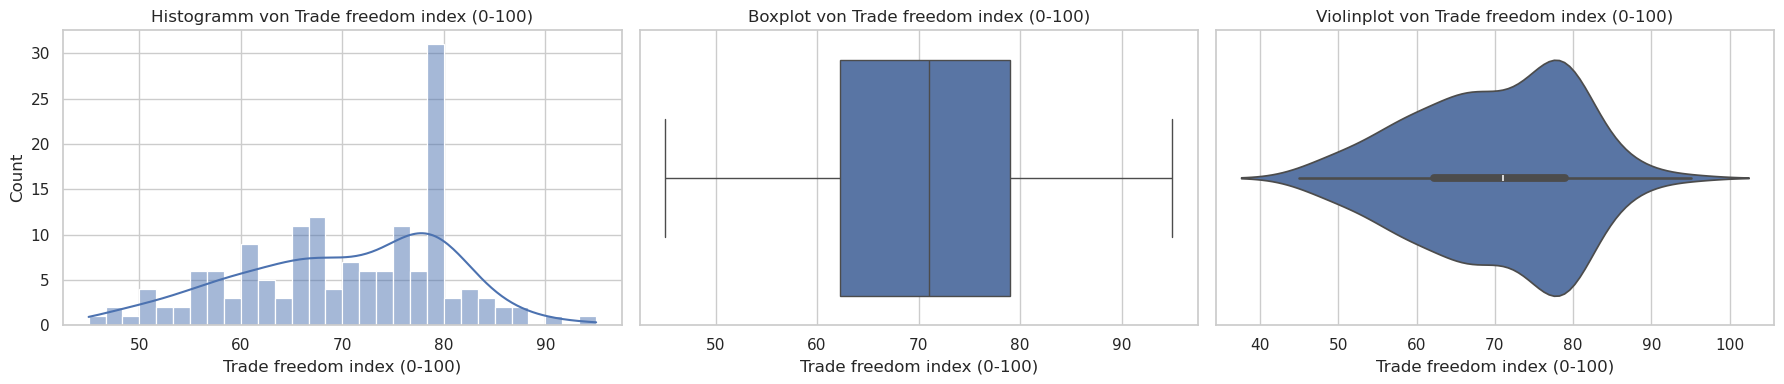

Überspringe Economic globalization index (0-100): keine gültigen Werte.


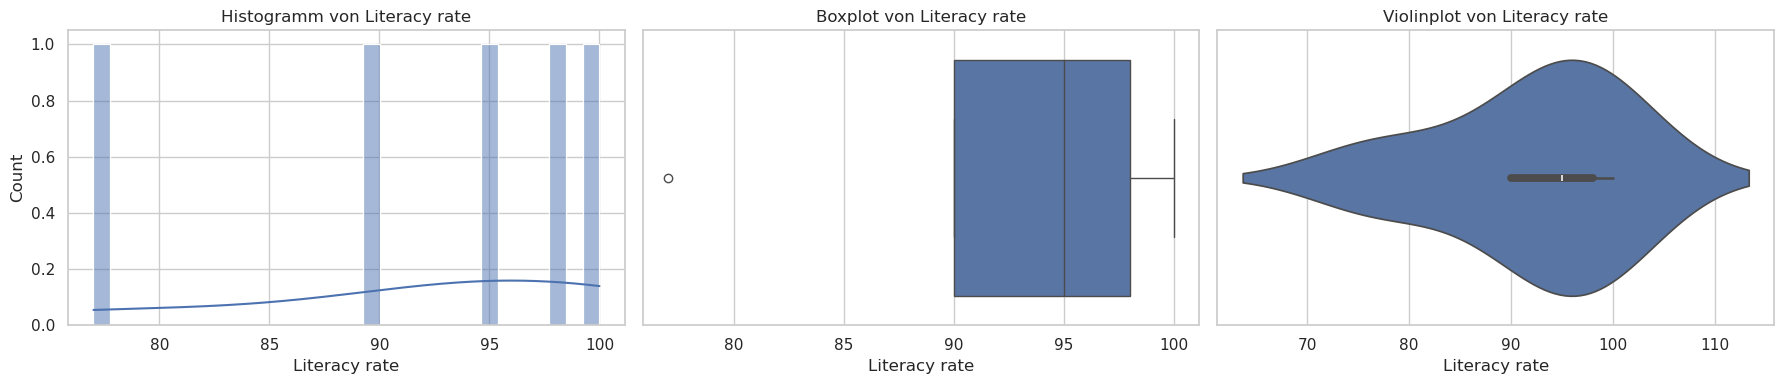

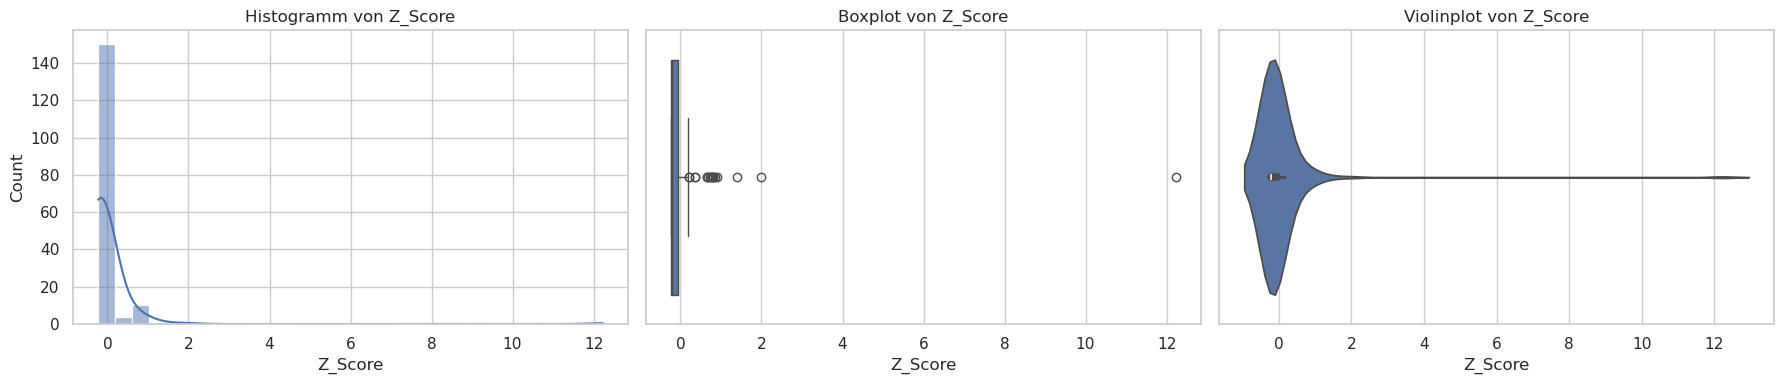

In [31]:
num_cols = df_2023.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    col_data = df_2023[col].dropna()

    # Wenn Spalte nur NaNs enthält, überspringen
    if col_data.empty:
        print(f"Überspringe {col}: keine gültigen Werte.")
        continue

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogramm
    sns.histplot(col_data, kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Histogramm von {col}')

    # Boxplot
    sns.boxplot(x=col_data, ax=axes[1])
    axes[1].set_title(f'Boxplot von {col}')

    # Violinplot
    sns.violinplot(x=col_data, ax=axes[2])
    axes[2].set_title(f'Violinplot von {col}')

    plt.tight_layout()
    plt.show()


## Exploratory Data Analysis (EDA)

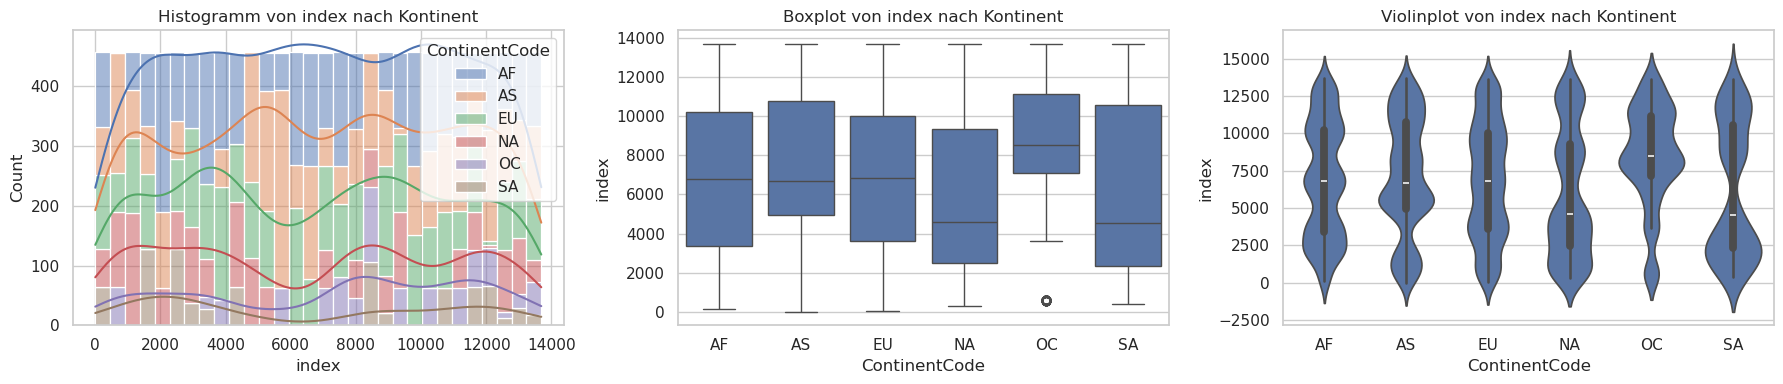

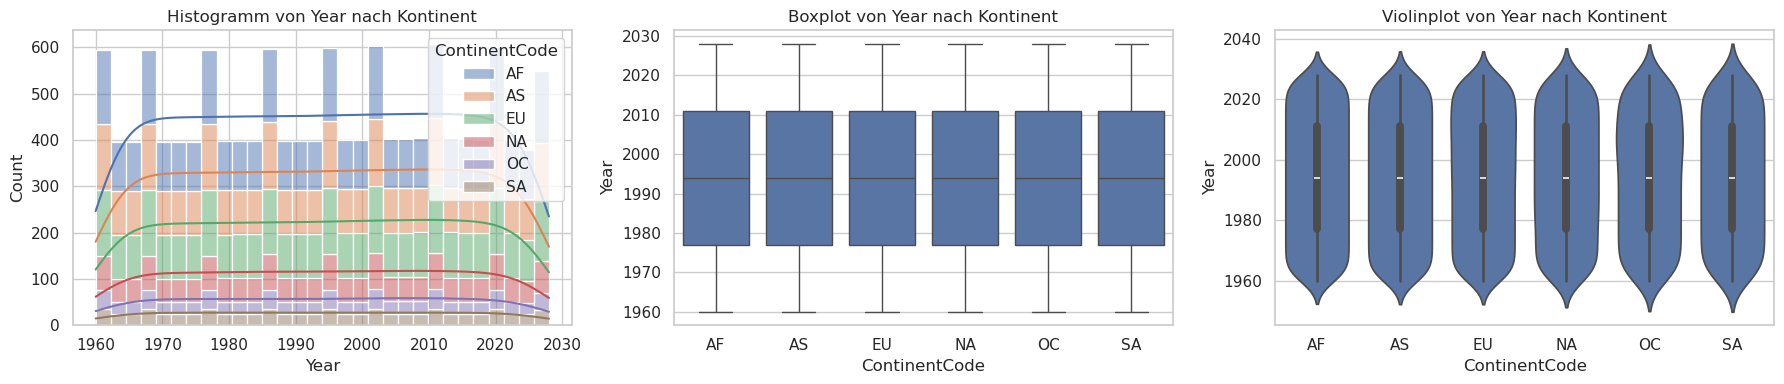

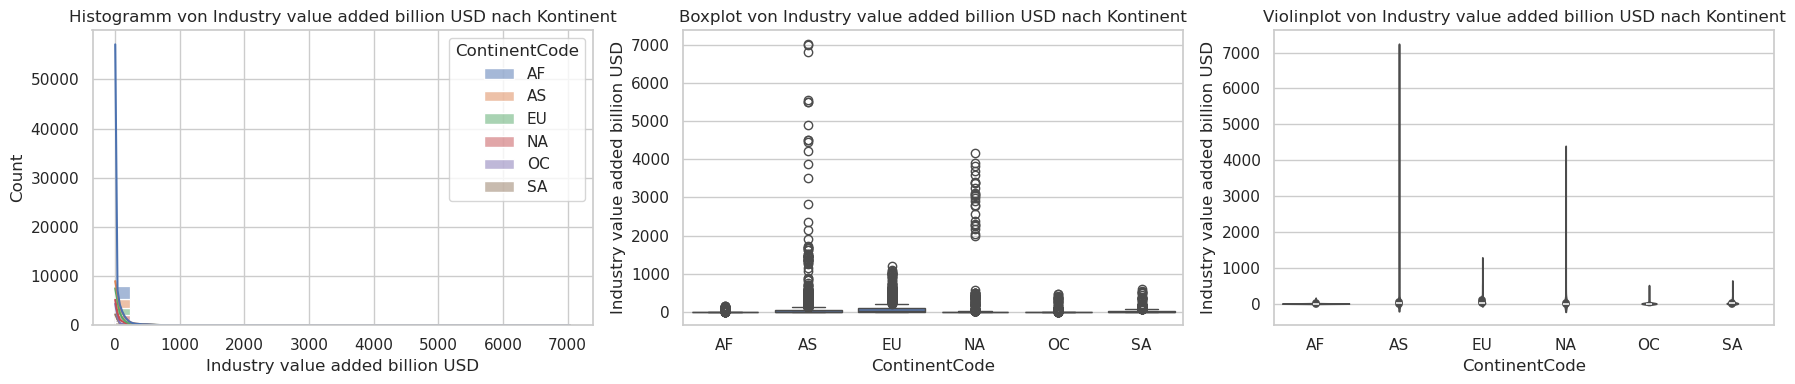

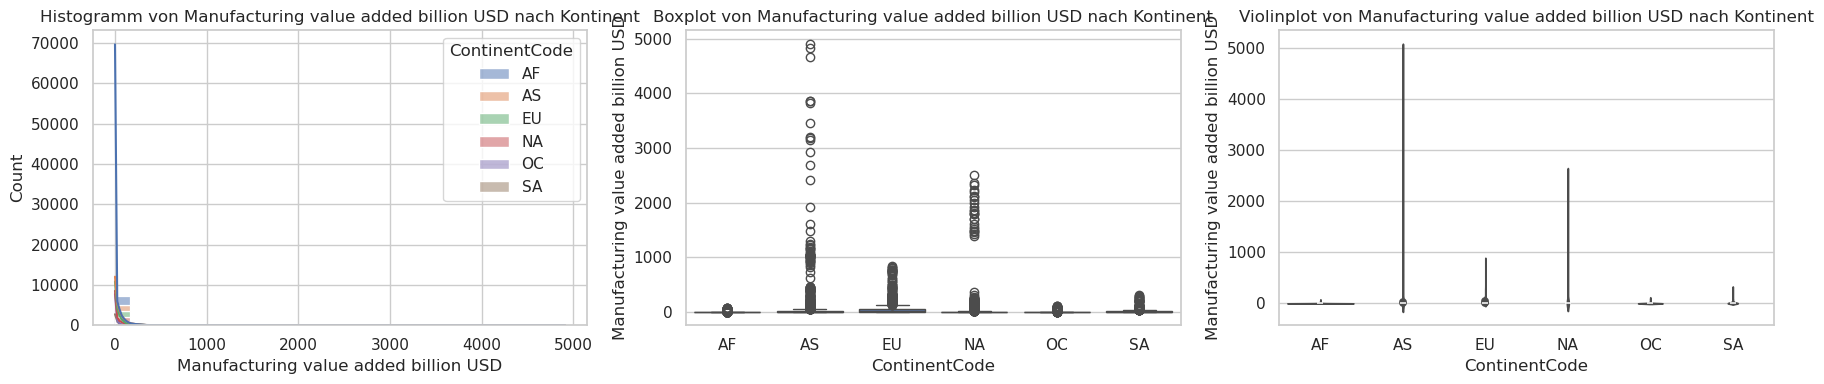

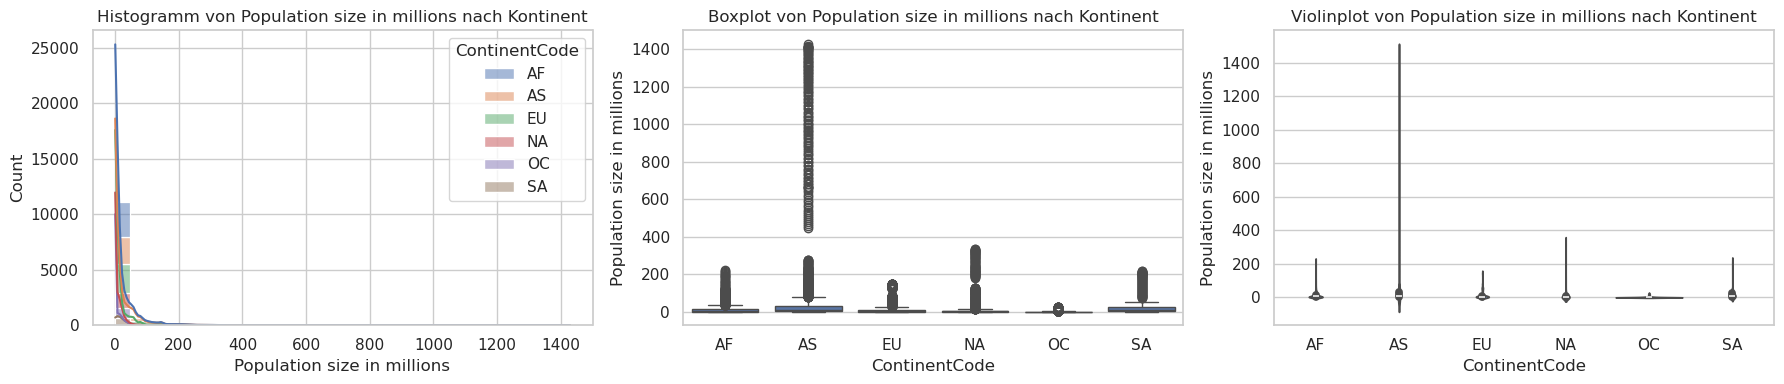

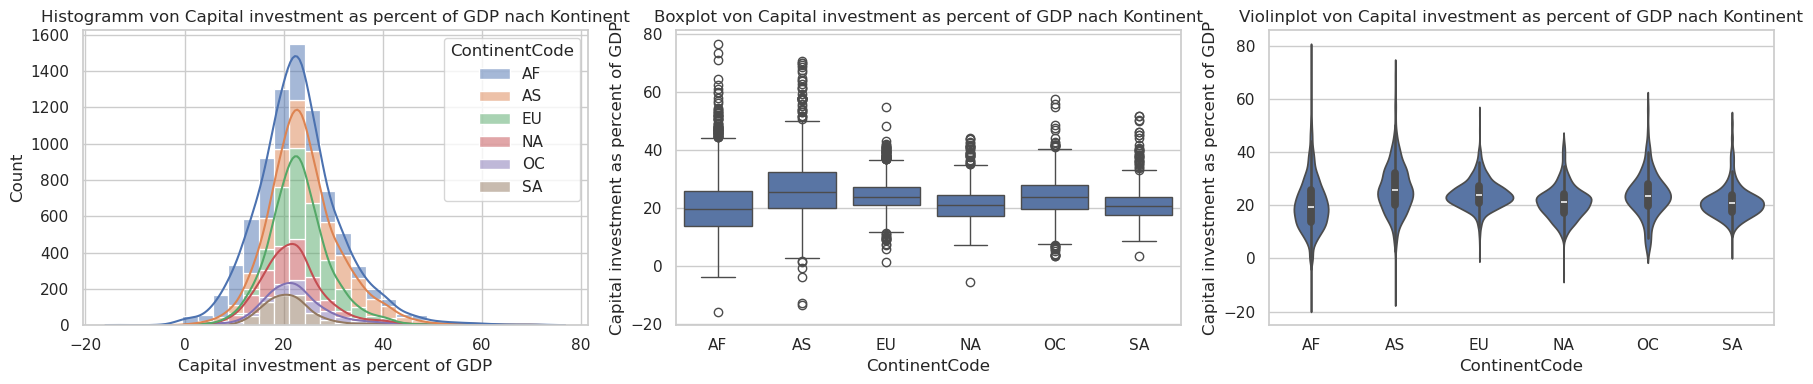

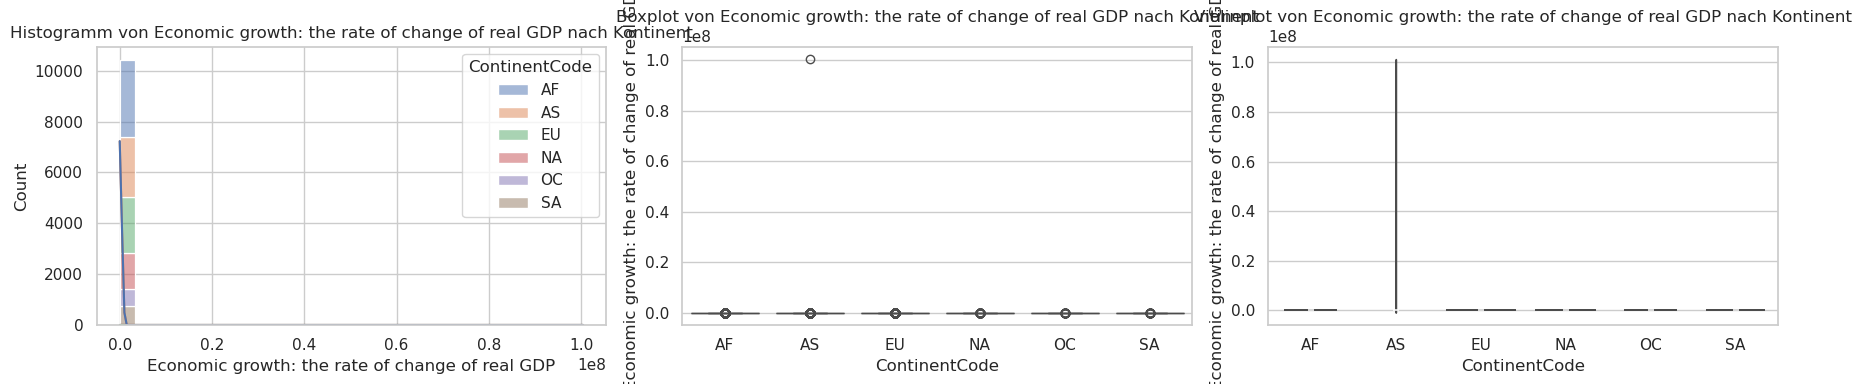

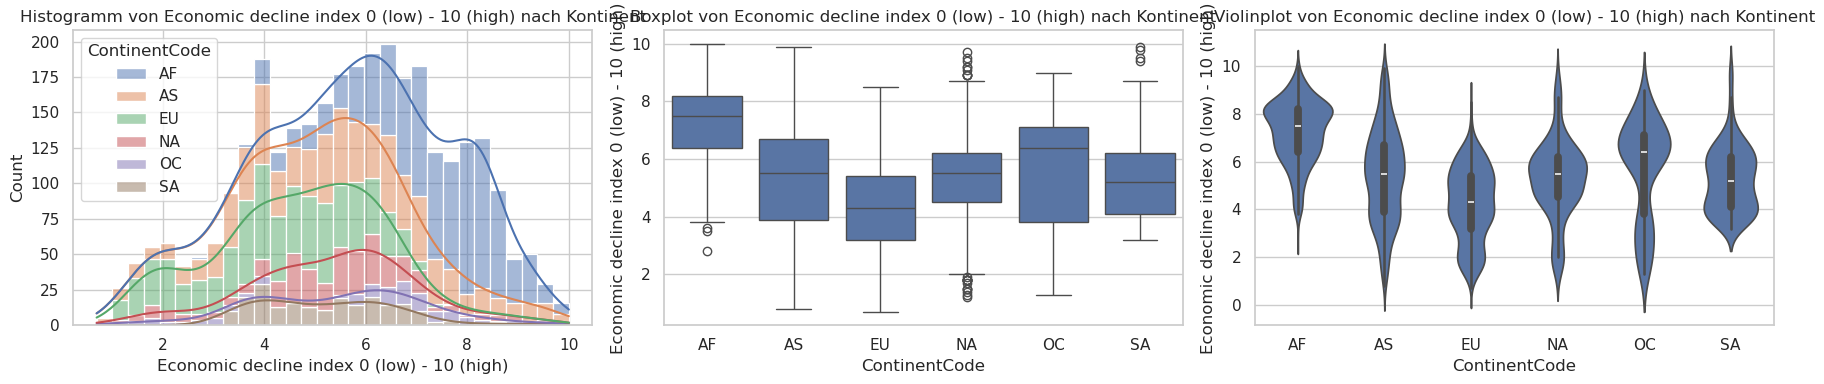

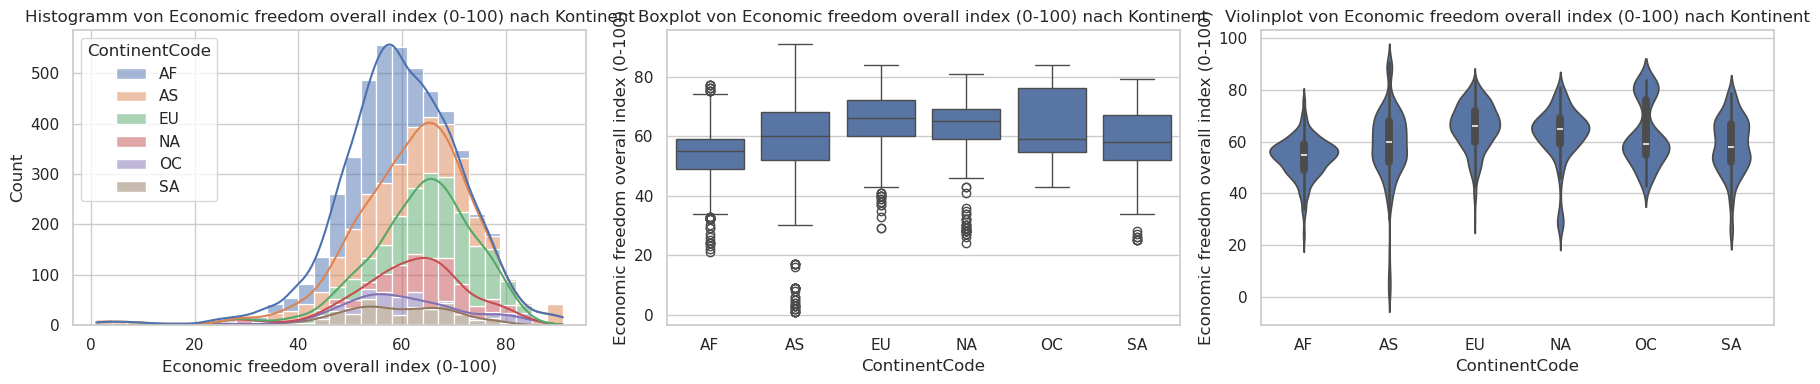

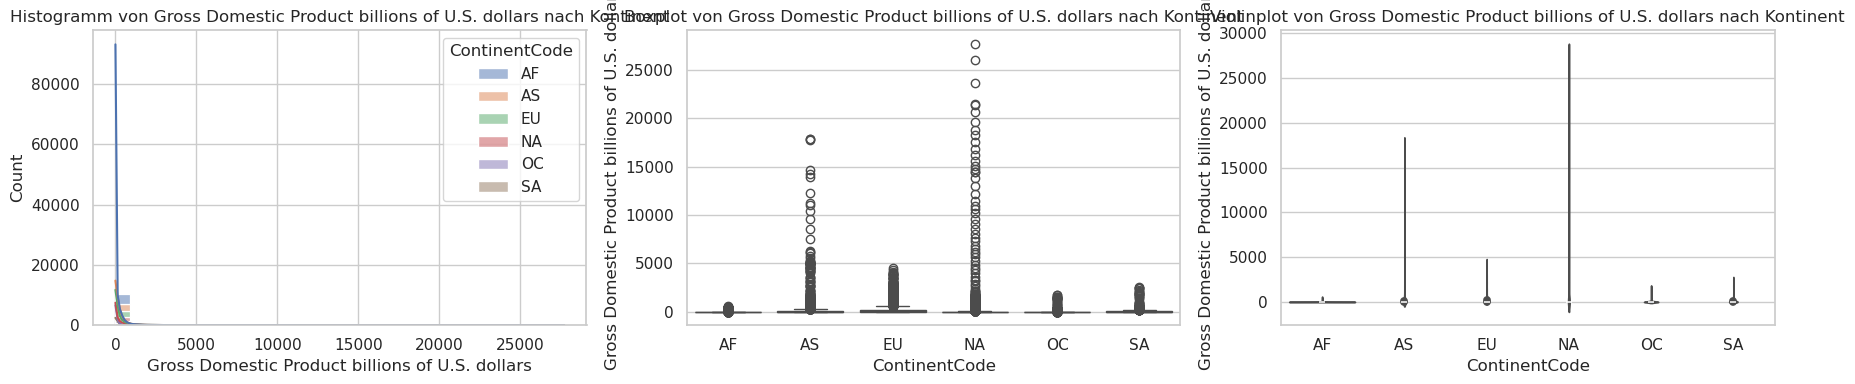

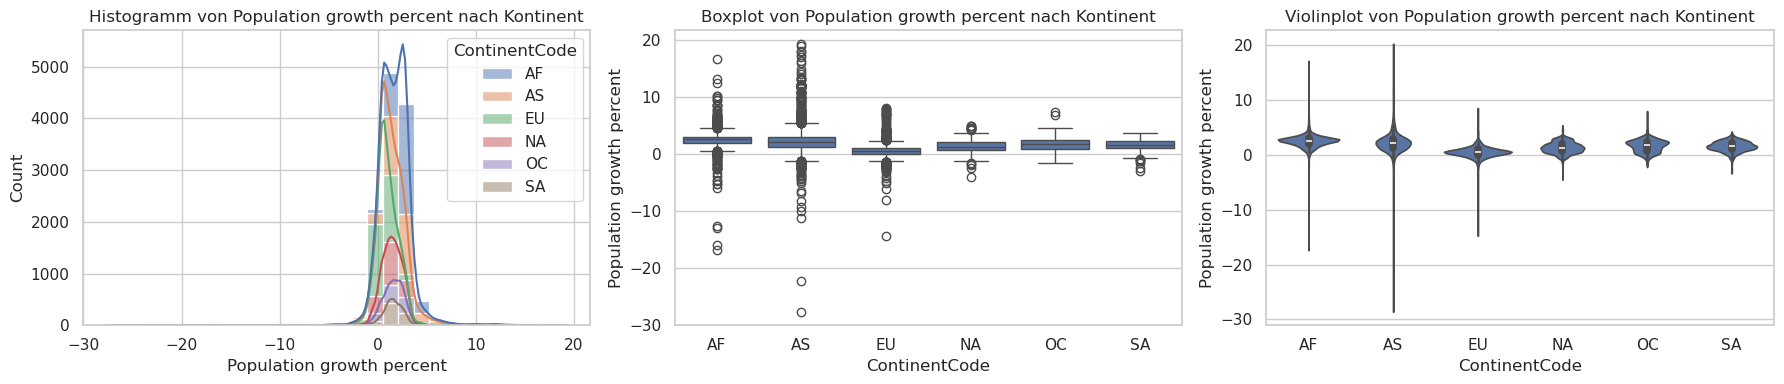

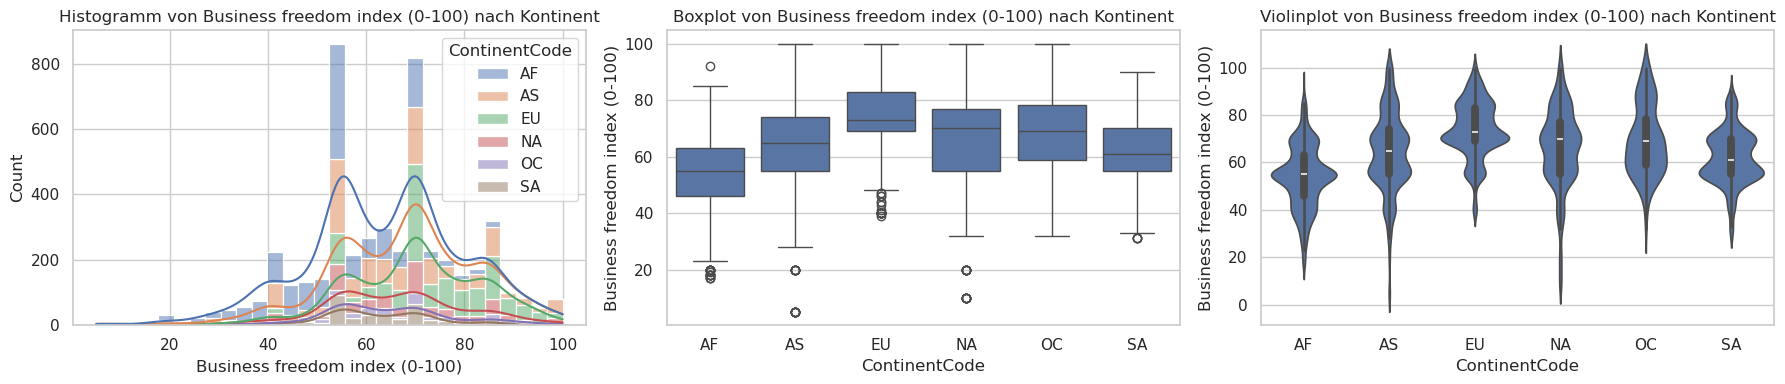

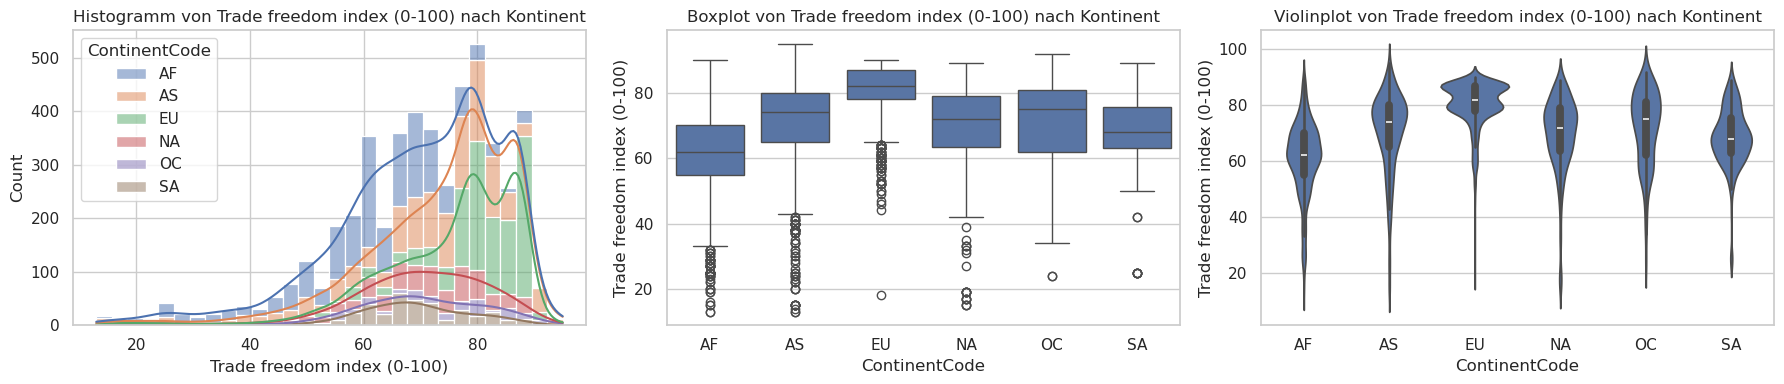

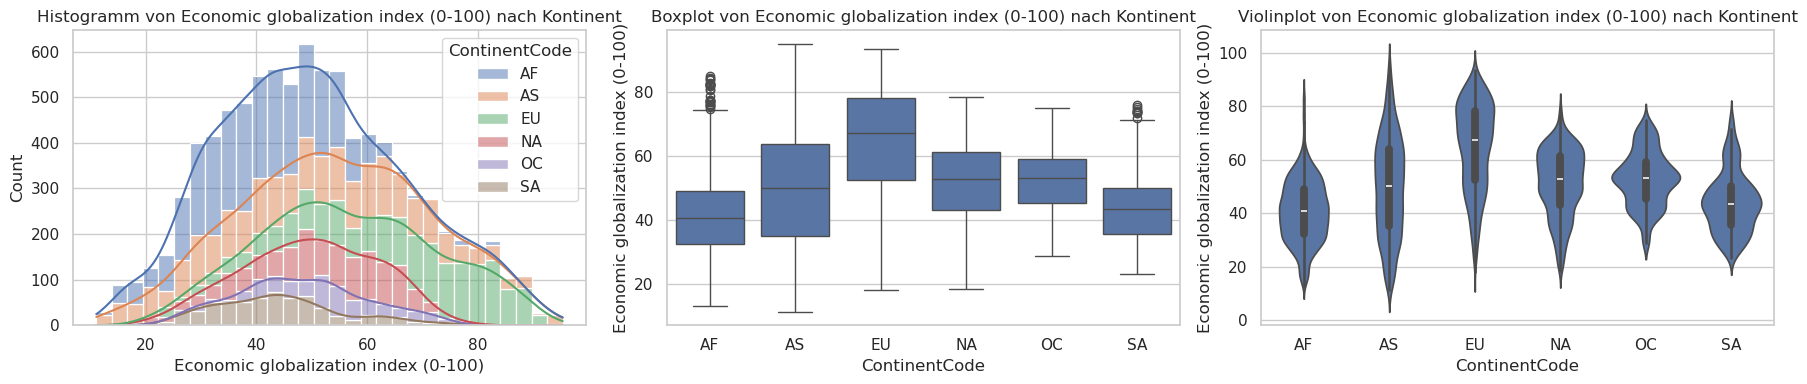

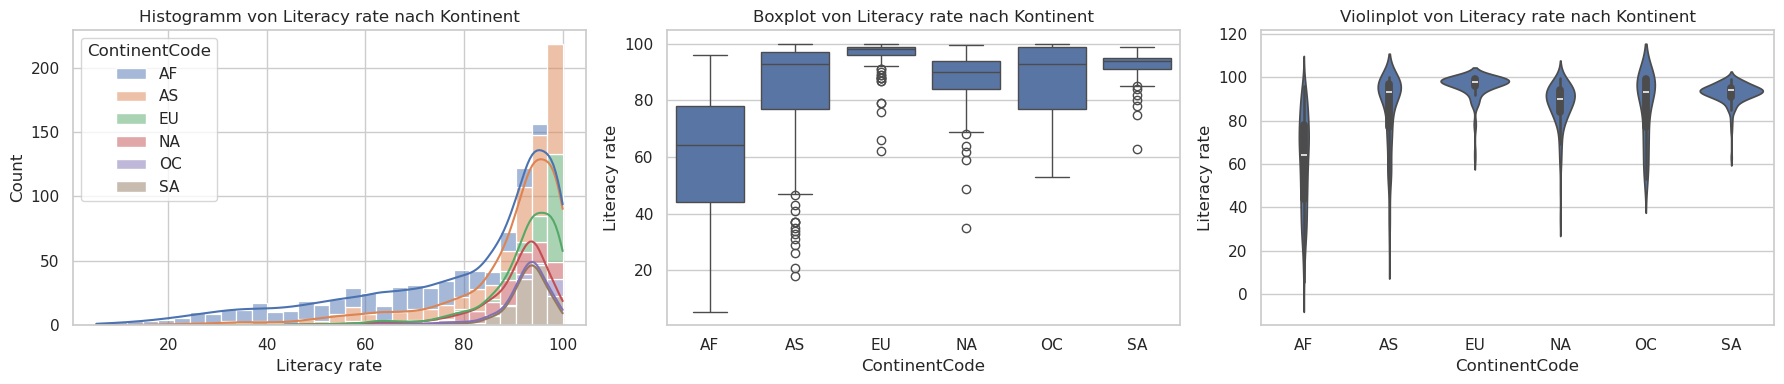

In [32]:
# Stelle sicher, dass die Kontinent-Spalte korrekt benannt ist
continent_col = 'ContinentCode'

# Nur numerische Spalten
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # drei Spalten, eine Zeile

    # Histogramm pro Kontinent
    sns.histplot(data=df, x=col, hue=continent_col, kde=True, bins=30, ax=axes[0], multiple="stack")
    axes[0].set_title(f'Histogramm von {col} nach Kontinent')

    # Boxplot pro Kontinent
    sns.boxplot(data=df, x=continent_col, y=col, ax=axes[1])
    axes[1].set_title(f'Boxplot von {col} nach Kontinent')

    # Violinplot pro Kontinent
    sns.violinplot(data=df, x=continent_col, y=col, ax=axes[2])
    axes[2].set_title(f'Violinplot von {col} nach Kontinent')

    plt.tight_layout()
    plt.show()


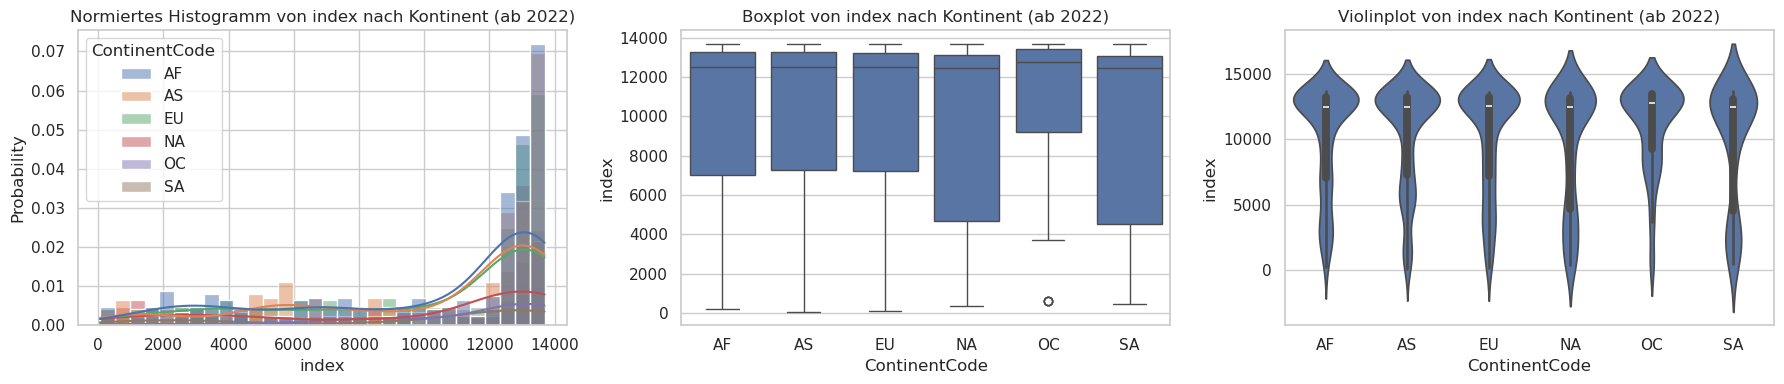

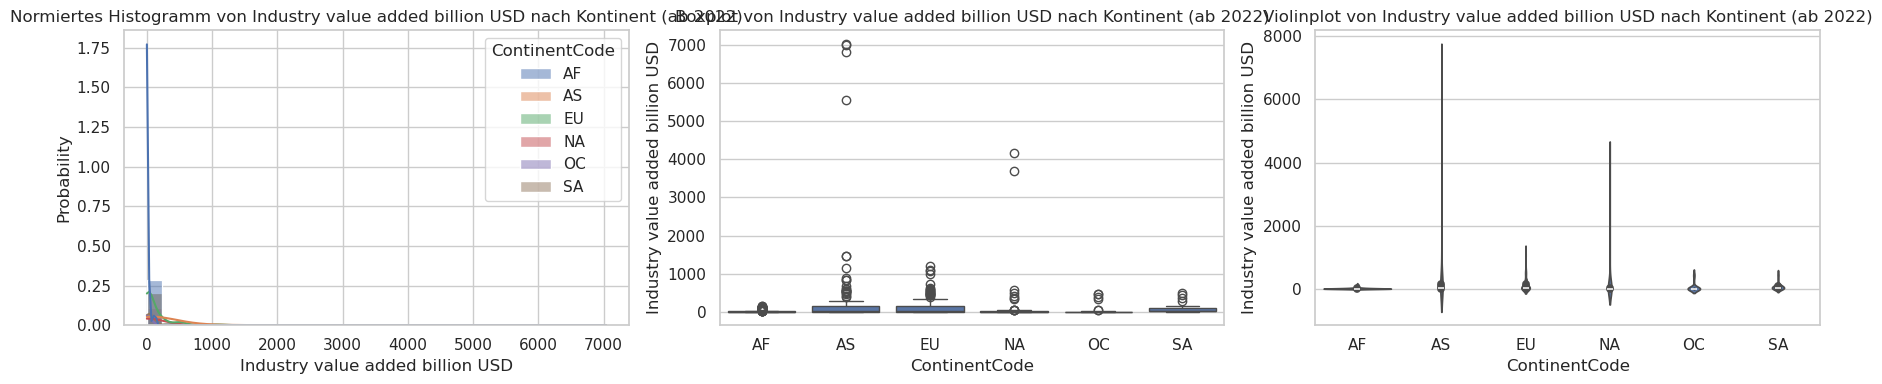

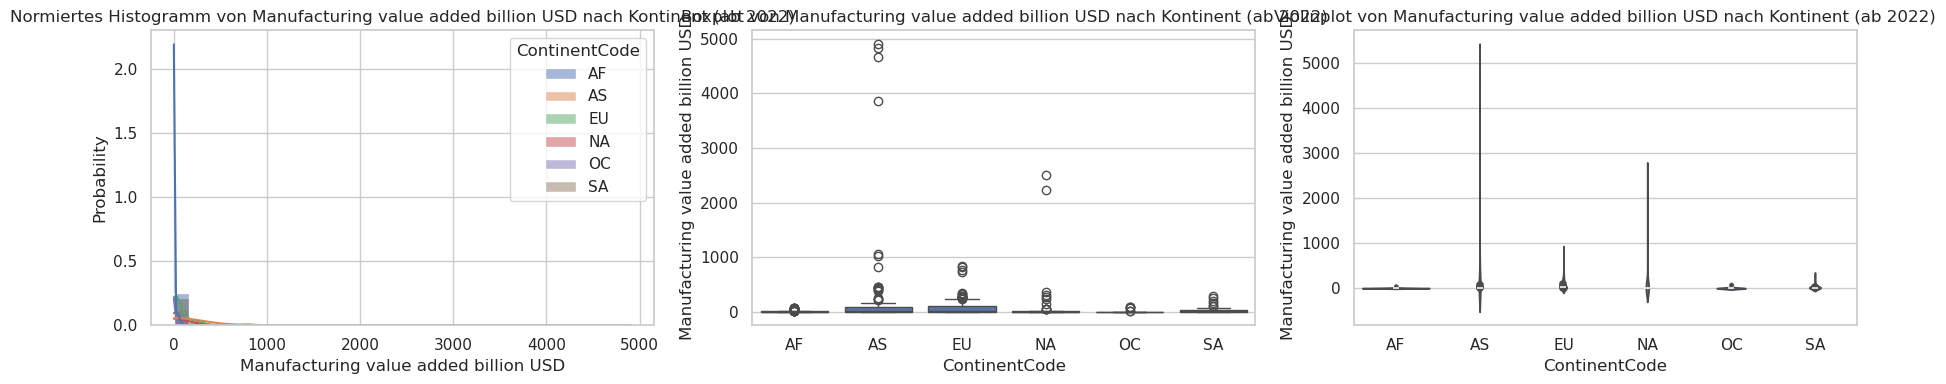

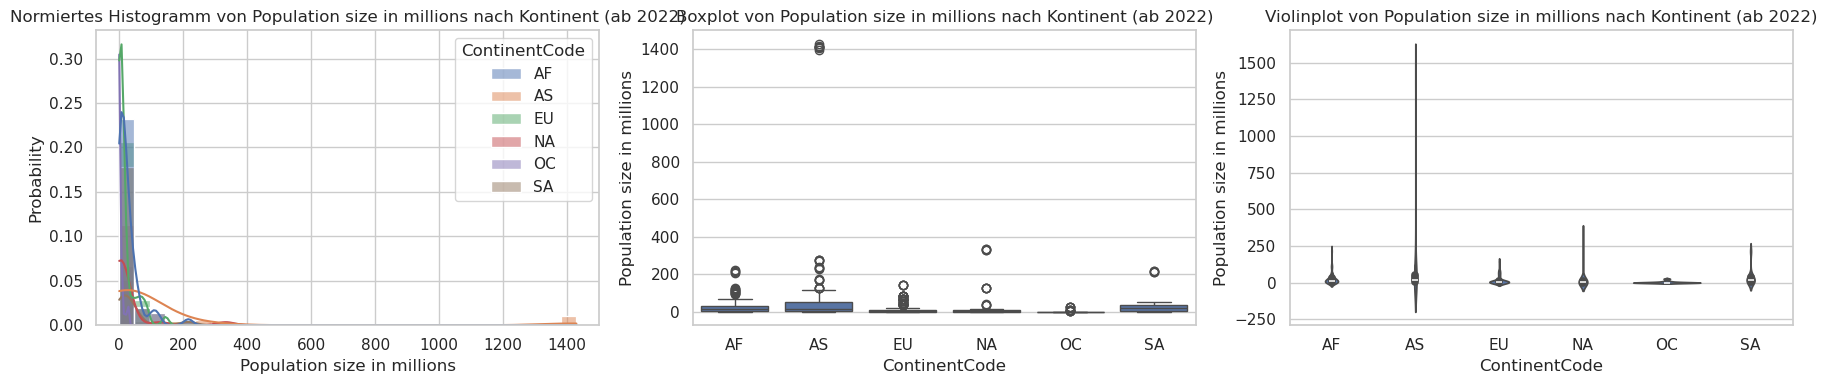

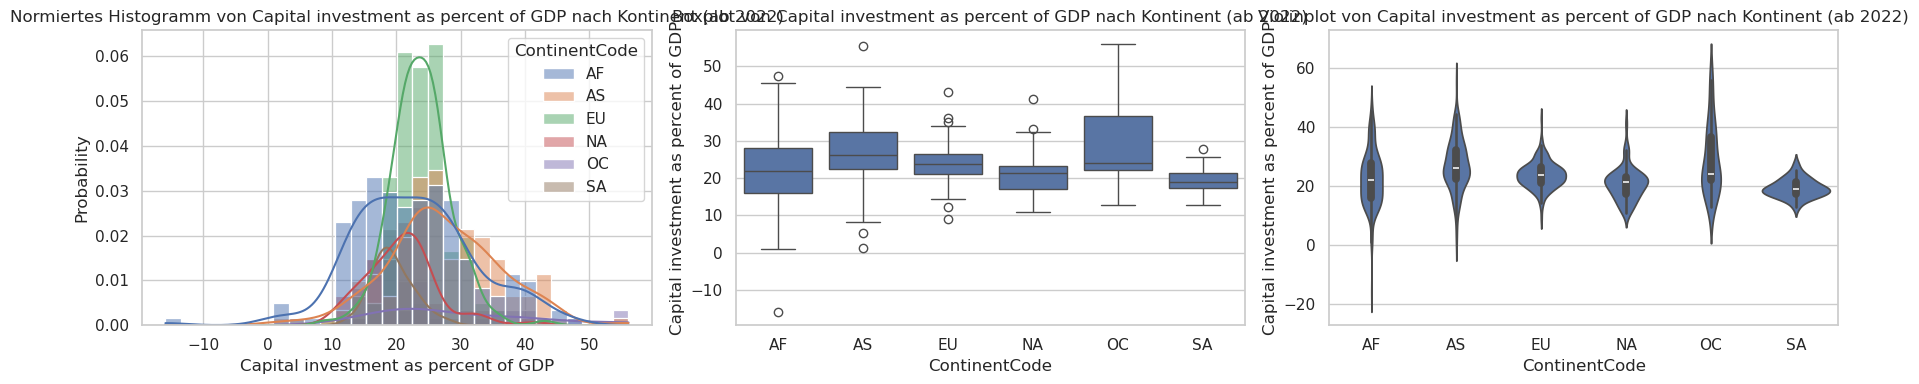

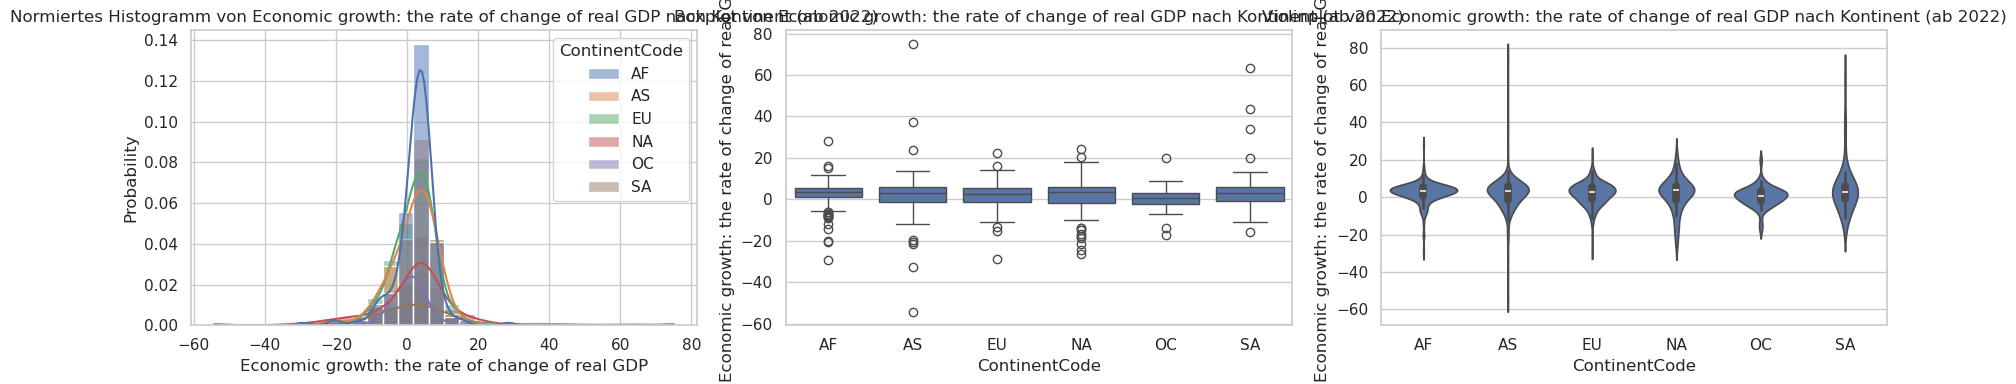

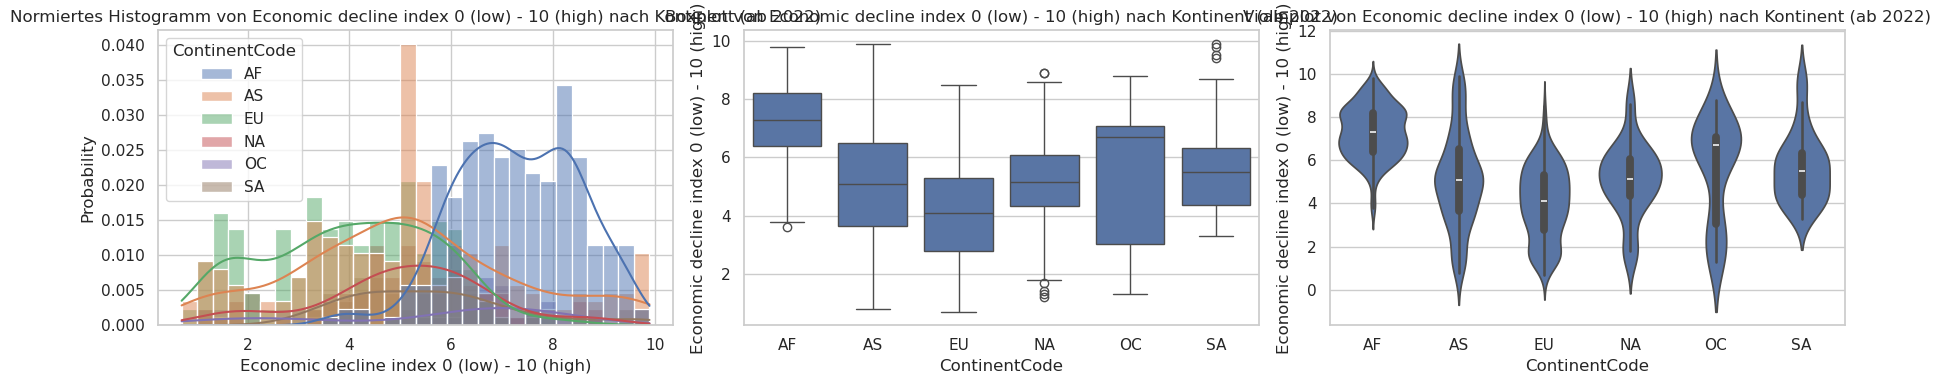

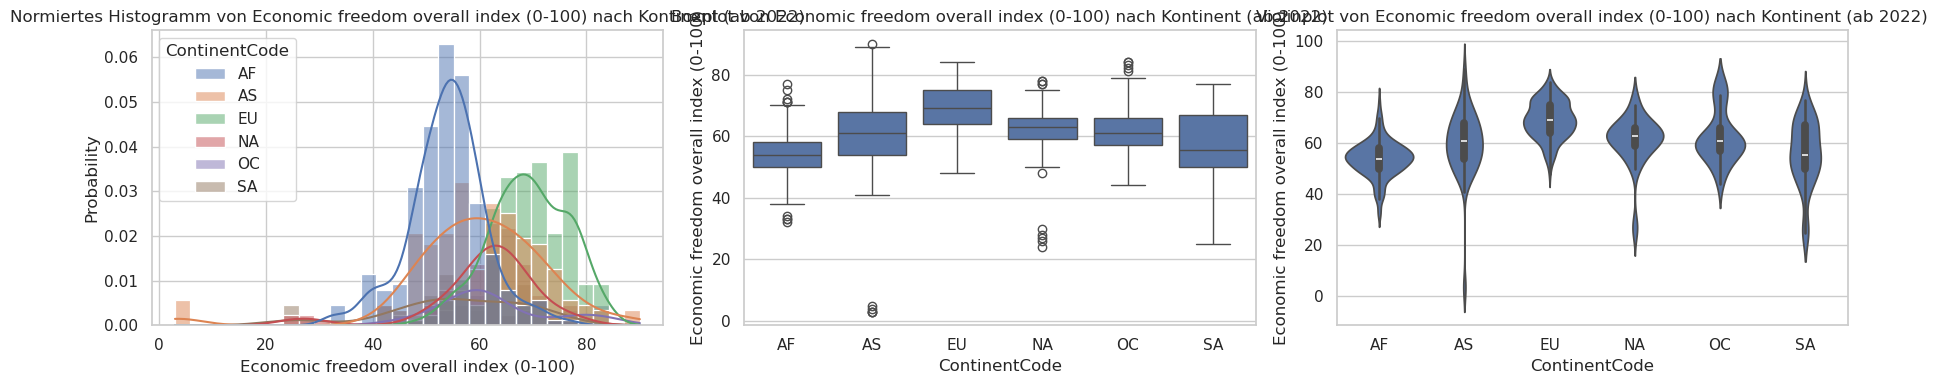

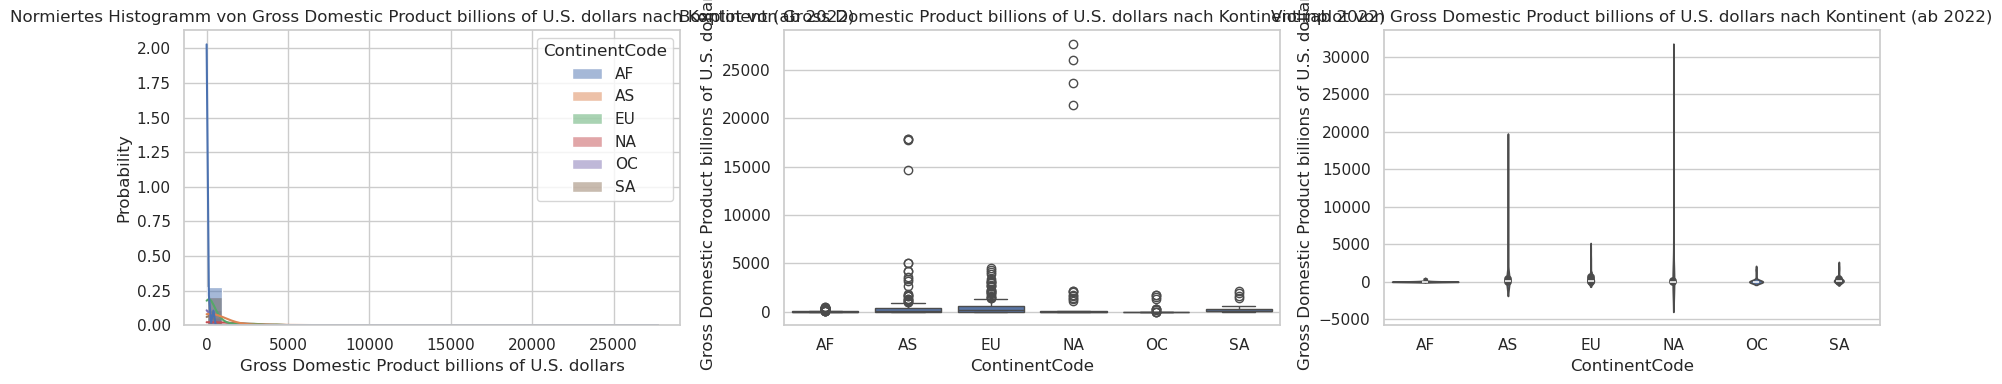

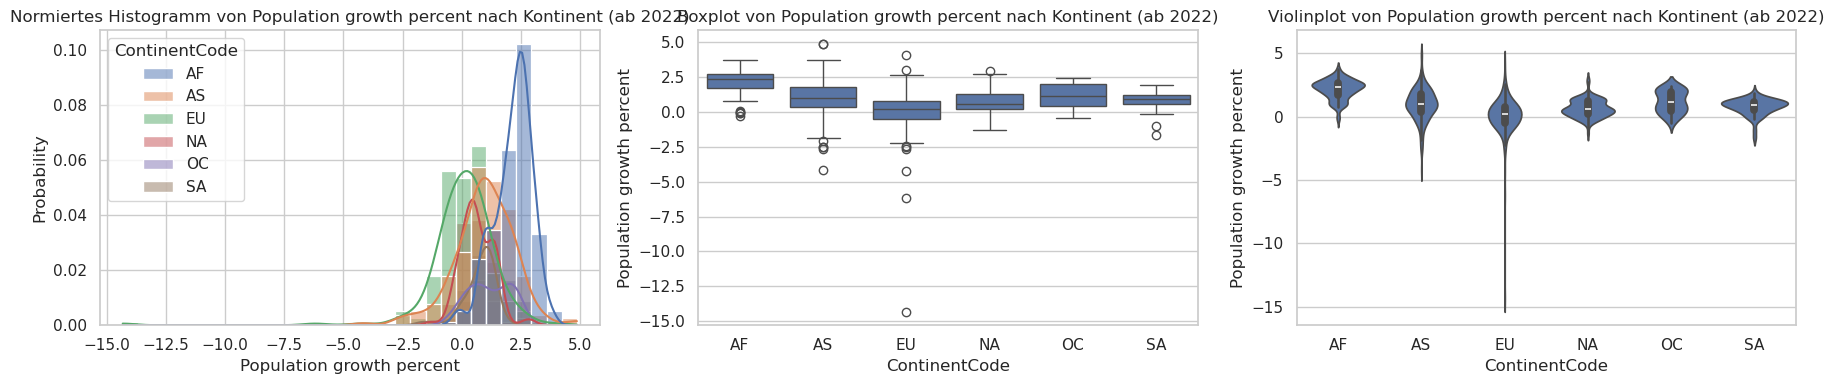

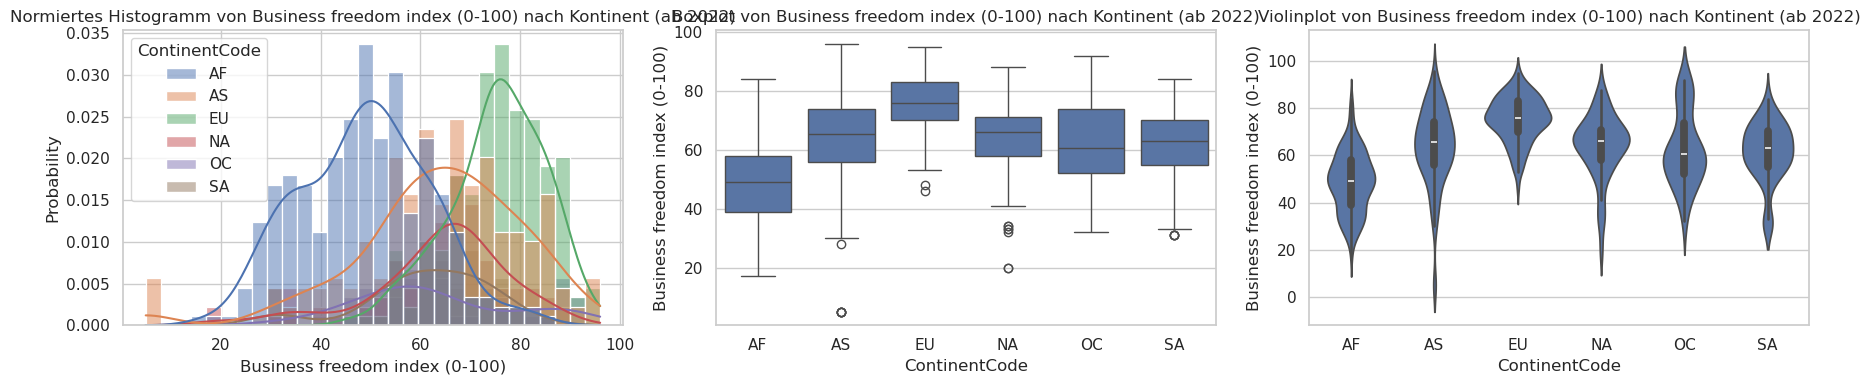

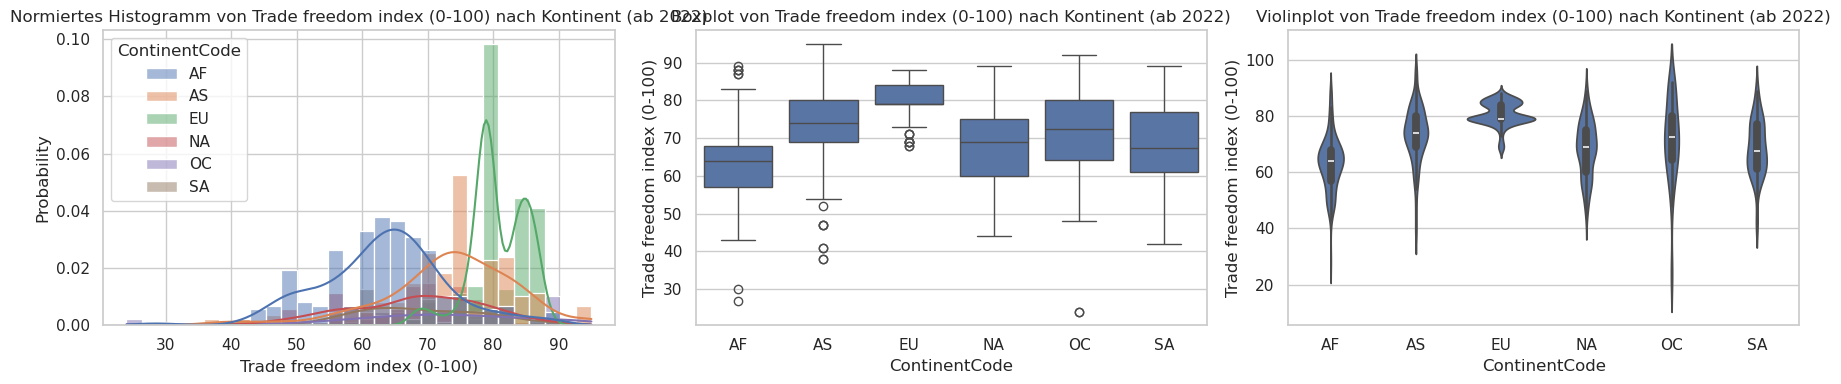

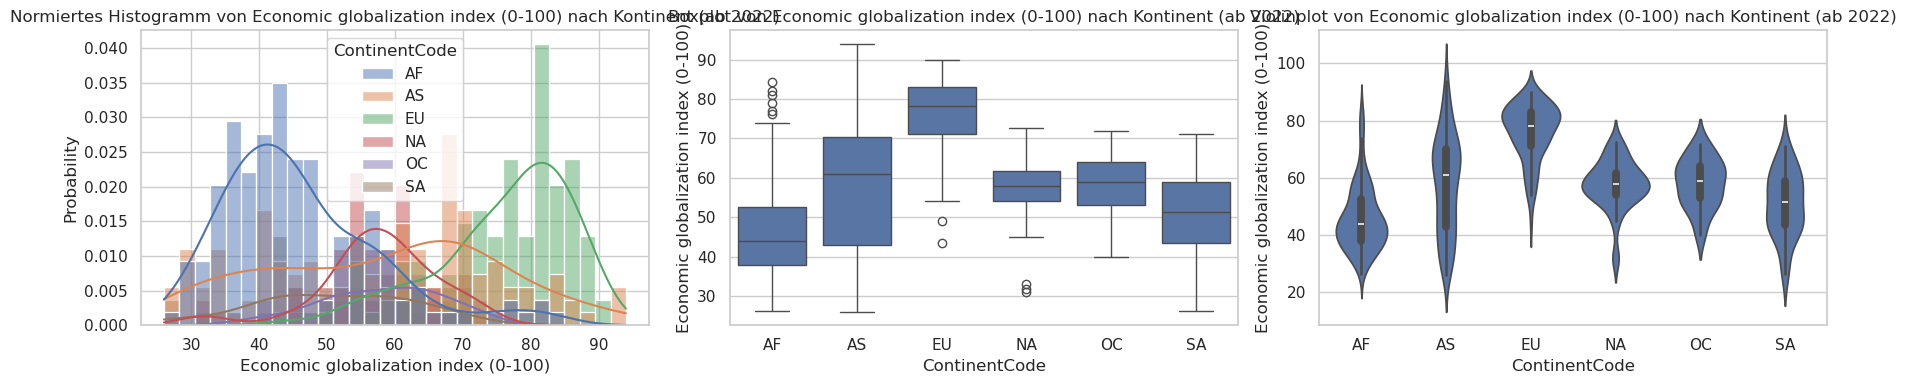

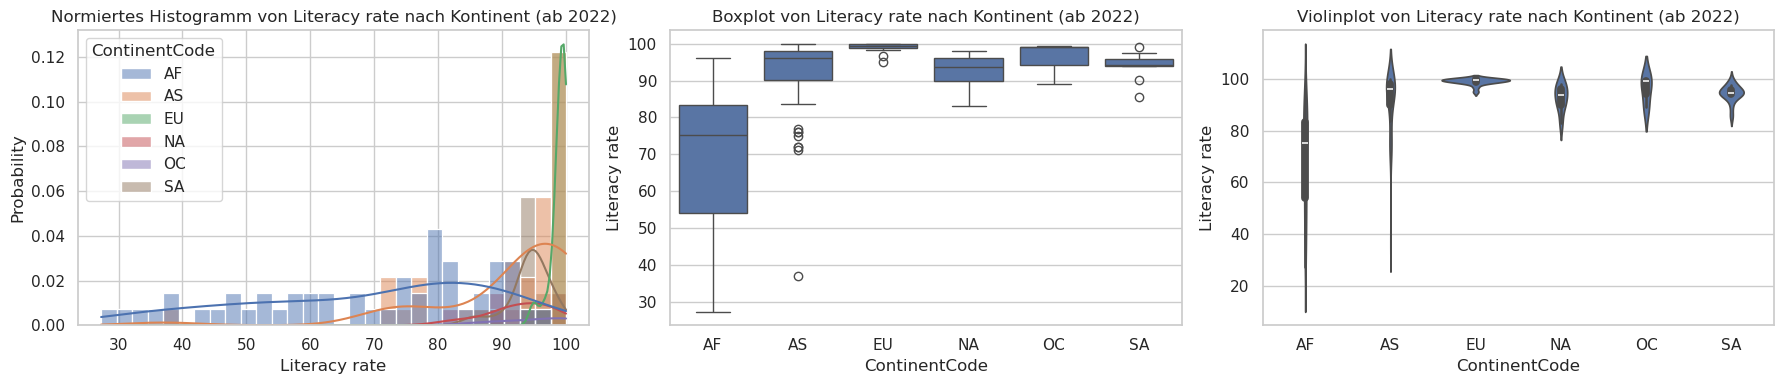

In [33]:
# Spaltennamen anpassen
continent_col = 'ContinentCode'
year_col = 'Year'

# Ab 2022 filtern
df_filtered = df[df[year_col] >= 2020].copy()

# Numerische Spalten ohne Jahr
num_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols if col != year_col]

for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogramm mit normalisierter Häufigkeit
    sns.histplot(
        data=df_filtered,
        x=col,
        hue=continent_col,
        kde=True,
        bins=30,
        ax=axes[0],
        multiple="layer",  # Optional: "stack" oder "dodge"
        stat="probability"  # Oder "density"
    )
    axes[0].set_title(f'Normiertes Histogramm von {col} nach Kontinent (ab 2022)')

    # Boxplot
    sns.boxplot(data=df_filtered, x=continent_col, y=col, ax=axes[1])
    axes[1].set_title(f'Boxplot von {col} nach Kontinent (ab 2022)')

    # Violinplot
    sns.violinplot(data=df_filtered, x=continent_col, y=col, ax=axes[2])
    axes[2].set_title(f'Violinplot von {col} nach Kontinent (ab 2022)')

    plt.tight_layout()
    plt.show()


### Correlation Matrix

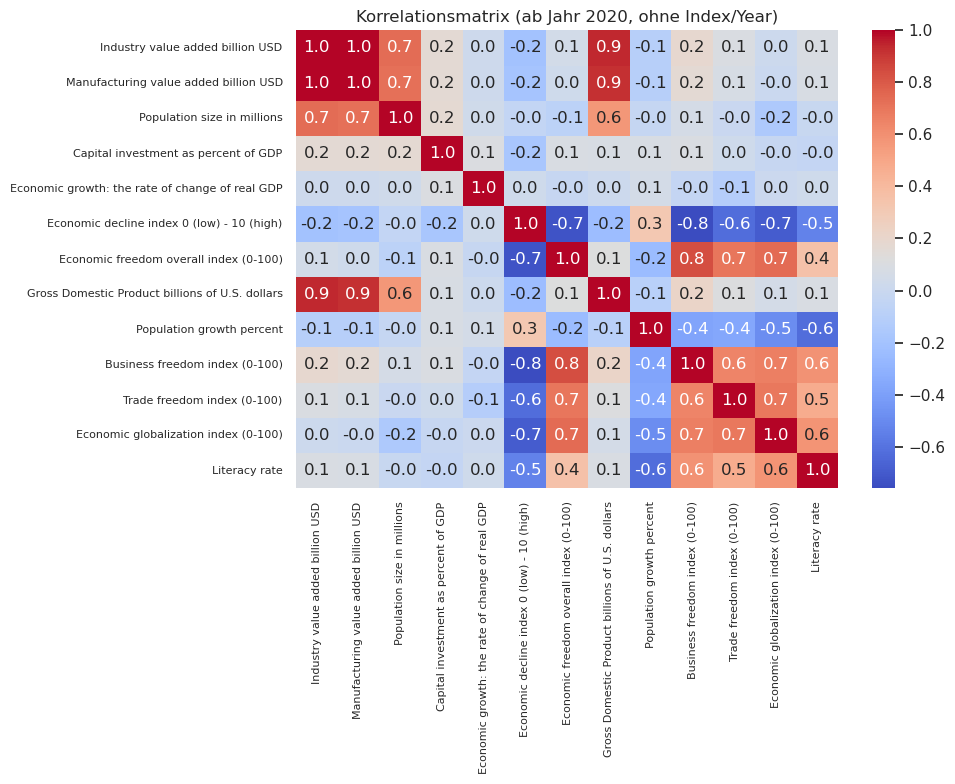

In [34]:
# Filter für Jahr >= 2020
df_filtered = df[df['Year'] >= 2020]

# Numerische Spalten auswählen, aber 'index' und 'Year' ausschließen
exclude_cols = ['index', 'Year']
num_cols = [col for col in df_filtered.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

# Korrelationsmatrix plotten
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Korrelationsmatrix (ab Jahr 2020, ohne Index/Year)')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.savefig('korrelationsmatrix.png', dpi=600)
plt.show()


### Pairplot

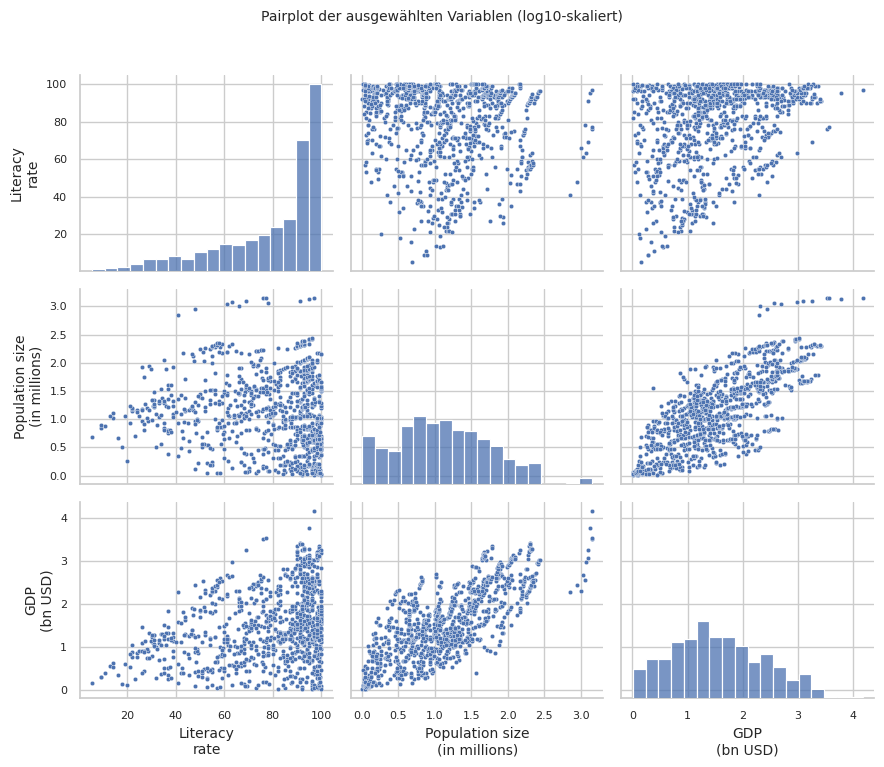

In [35]:
# Drei ausgewählte Variablen
selected_cols = [
    'Literacy rate',
    'Population size in millions',
    'Gross Domestic Product billions of U.S. dollars'
]

# Achsentitel in zwei Zeilen umformatieren
label_map = {
    'Literacy rate': 'Literacy\nrate',
    'Population size in millions': 'Population size\n(in millions)',
    'Gross Domestic Product billions of U.S. dollars': 'GDP\n(bn USD)'
}

# Log-Skalierung anwenden (außer 'Literacy rate')
df_log = df[selected_cols].dropna().copy()
df_log[selected_cols[1:]] = df_log[selected_cols[1:]].apply(lambda x: np.log10(x + 1))

# Pairplot mit kleineren Punkten
g = sns.pairplot(
    df_log,
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10}
)

# Achsenbeschriftungen anpassen (2-zeilig, größer)
for ax in g.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in label_map:
            ax.set_xlabel(label_map[xlabel], fontsize=10)
        if ylabel in label_map:
            ax.set_ylabel(label_map[ylabel], fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Titel und Layout
plt.suptitle('Pairplot der ausgewählten Variablen (log10-skaliert)', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


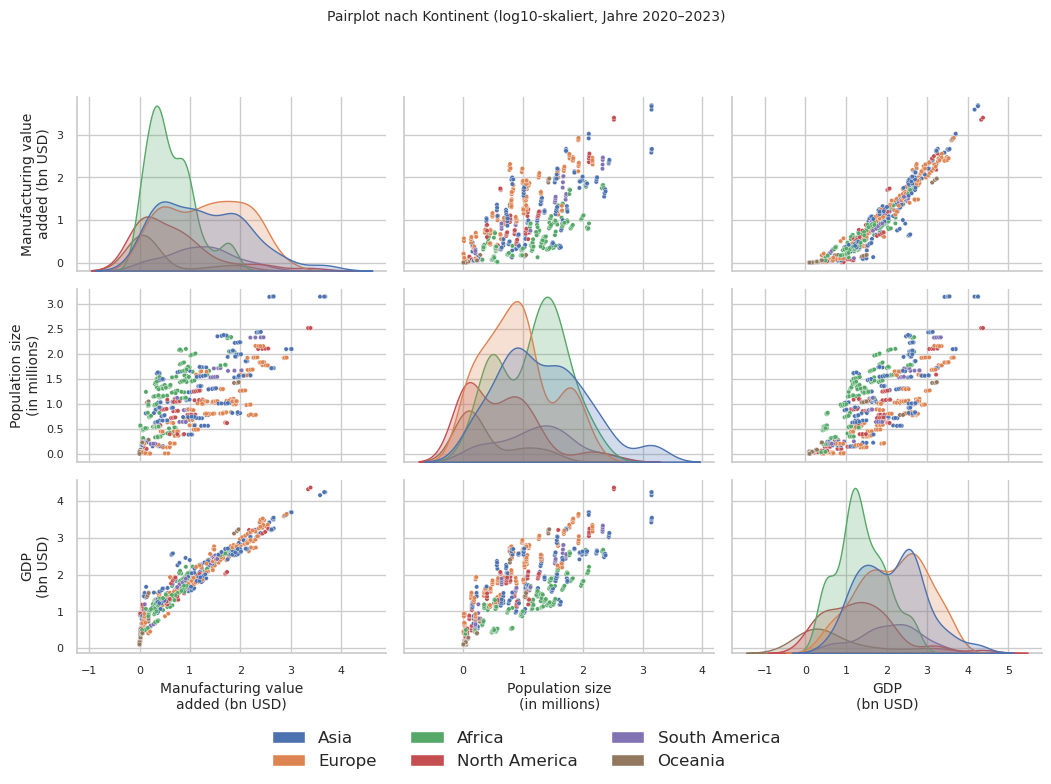

In [37]:
# Drei ausgewählte Variablen
selected_cols = [
    'Manufacturing value added billion USD',
    'Population size in millions',
    'Gross Domestic Product billions of U.S. dollars'
]

# Achsentitel in zwei Zeilen umformatieren
label_map = {
    'Manufacturing value added billion USD': 'Manufacturing value\nadded (bn USD)',
    'Population size in millions': 'Population size\n(in millions)',
    'Gross Domestic Product billions of U.S. dollars': 'GDP\n(bn USD)'
}

# Daten filtern: nur 2020–2023, keine NaN, 'Continent' einbeziehen
df_filtered = df[df['Year'].between(2020, 2023)].copy()
df_log = df_filtered[selected_cols + ['Continent']].dropna().copy()

# Log-Skalierung anwenden
df_log[selected_cols] = df_log[selected_cols].apply(lambda x: np.log10(x + 1))

# Pairplot mit hue=Continent
g = sns.pairplot(
    df_log,
    hue='Continent',
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10}
)

# Automatische Legende entfernen
if g._legend is not None:
    g._legend.remove()

# Farben aus Line2D-Objekten extrahieren
legend_elements = [
    Patch(facecolor=g._legend_data[label].get_color(), label=label)
    for label in g._legend_data
]

# Achsenbeschriftungen anpassen (2-zeilig, größer)
for ax in g.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in label_map:
            ax.set_xlabel(label_map[xlabel], fontsize=10)
        if ylabel in label_map:
            ax.set_ylabel(label_map[ylabel], fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Neue, sichtbare Legende unten zentriert einfügen
g.fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=3,
    fontsize=12,
    frameon=False
)

# Titel und Layout
plt.suptitle('Pairplot nach Kontinent (log10-skaliert, Jahre 2020–2023)', y=1.03, fontsize=10)
plt.tight_layout(rect=[0, 0.07, 1, 0.98])  # Platz für Legende schaffen
plt.show()


### Paretoplot

/tmp/ipykernel_3101767/2958058207.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pop = df_pop.groupby('Country', as_index=False)['Population size in millions'].sum()


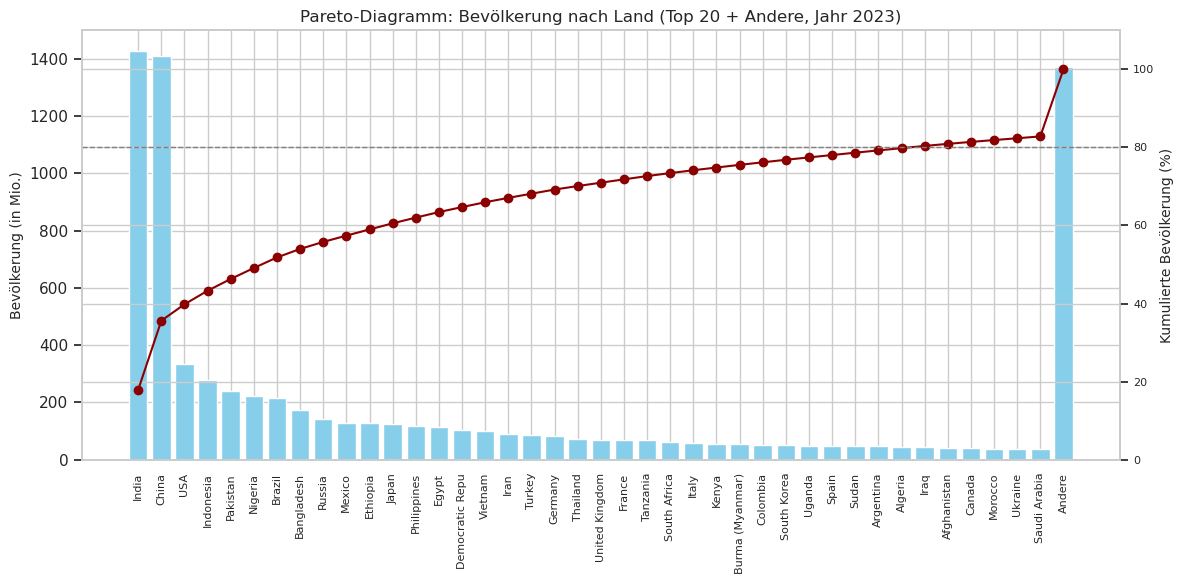

In [38]:
# --- 1. Daten vorbereiten ---

# Filter auf Jahr 2023 und relevante Spalten
df_2023 = df[df['Year'] == 2023].copy()
df_pop = df_2023[['Country', 'Population size in millions']].dropna()

# Gruppieren nach Land (falls mehrfach vorhanden) und summieren
df_pop = df_pop.groupby('Country', as_index=False)['Population size in millions'].sum()

# Sortieren nach Bevölkerungsgröße
df_pop_sorted = df_pop.sort_values(by='Population size in millions', ascending=False).reset_index(drop=True)

# --- 2. Top 20 + "Andere" zusammenfassen ---
top_n = 40
df_top = df_pop_sorted.head(top_n).copy()

# Restliche Länder aggregieren
rest = df_pop_sorted.tail(len(df_pop_sorted) - top_n)
other_sum = rest['Population size in millions'].sum()

# "Andere"-Zeile hinzufügen
df_top = pd.concat([
    df_top,
    pd.DataFrame([{'Country': 'Andere', 'Population size in millions': other_sum}])
], ignore_index=True)

# Kumulierte Prozentwerte berechnen
df_top['cum_percent'] = df_top['Population size in millions'].cumsum() / df_top['Population size in millions'].sum() * 100

# Optional: Ländernamen kürzen, falls zu lang
df_top['Country'] = df_top['Country'].str.slice(0, 15)

# --- 3. Plot erstellen ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Balken für absolute Bevölkerungsgröße
ax1.bar(df_top['Country'], df_top['Population size in millions'], color='skyblue')
ax1.set_ylabel('Bevölkerung (in Mio.)', fontsize=10)
ax1.tick_params(axis='x', rotation=90, labelsize=8)

# Zweite Y-Achse für kumulierte Prozentwerte
ax2 = ax1.twinx()
ax2.plot(df_top['Country'], df_top['cum_percent'], color='darkred', marker='o')
ax2.set_ylabel('Kumulierte Bevölkerung (%)', fontsize=10)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_ylim(0, 110)

# Hilfslinie bei 80 %
ax2.axhline(80, color='gray', linestyle='dashed', linewidth=1)

# Titel und Layout
plt.title('Pareto-Diagramm: Bevölkerung nach Land (Top 20 + Andere, Jahr 2023)', fontsize=12)
plt.tight_layout()
plt.show()
